# Visualization of KSI dataset (Predestrian) for Toronto Police Service -- Sprint 1
by Tony Chan, Micahaela Hrabetova, Lu Han, Sangeeta Khanna

## Motivation
Prepare data visualization for KSI (Predestrian subset). For sprint 1 purpose, we will prepare a preliminary dataset analysis for this dataset and try to find a good model to look for trends and insights.

In [1]:
from __future__ import division

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats


sns.set_style('whitegrid')
%matplotlib inline


# statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm


# sci-kit learn

from sklearn.linear_model import LinearRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import LinearSVC
# from sklearn import svm
# from sklearn.datasets import make_classification

# sci-kit learn Random Forest
import sklearn as sk
import sklearn.datasets as skd
import sklearn.ensemble as ske


# Performance metrics
from sklearn import metrics
from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score


# helpers
from numpy.random import randn
from pprint import pprint

## Data Structure and Description

In [2]:
df_meta = pd.read_csv("../src/data/pedestrian/KSI_Metadata.csv")
df_meta

Number          Field_Name  \
0      NaN               Index   
1      NaN              ACCNUM   
2      NaN                YEAR   
3      NaN                DATE   
4      NaN                TIME   
5      NaN                HOUR   
6      NaN             STREET1   
7      NaN             STREET2   
8      NaN              OFFSET   
9      NaN          ROAD_CLASS   
10     NaN            District   
11     NaN            LATITUDE   
12     NaN           LONGITUDE   
13     NaN            LOCCOORD   
14     NaN              ACCLOC   
15     NaN            TRAFFCTL   
16     NaN          VISIBILITY   
17     NaN               LIGHT   
18     NaN            RDSFCOND   
19     NaN             ACCLASS   
20     NaN           IMPACTYPE   
21     NaN             INVTYPE   
22     NaN              INVAGE   
23     NaN              INJURY   
24     NaN            FATAL_NO   
25     NaN             INITDIR   
26     NaN             VEHTYPE   
27     NaN           MANOEUVER   
28     NaN             DRIVACT   
29     NaN            DRIVCOND   
30     NaN             PEDTYPE   
31     NaN              PEDACT   
32     NaN             PEDCOND   
33     NaN          CYCLISTYPE   
34     NaN              CYCACT   
35     NaN             CYCCOND   
36     NaN          PEDESTRIAN   
37     NaN             CYCLIST   
38     NaN          AUTOMOBILE   
39     NaN          MOTORCYCLE   
40     NaN               TRUCK   
41     NaN       TRSN_CITY_VEH   
42     NaN           EMERG_VEH   
43     NaN           PASSENGER   
44     NaN            SPEEDING   
45     NaN             AG_DRIV   
46     NaN            REDLIGHT   
47     NaN             ALCOHOL   
48     NaN          DISABILITY   
49     NaN     Police Division   
50     NaN           City Ward   
51     NaN       City Ward ID    
52     NaN    Neighbourhood ID   
53     NaN  Neighbourhood Name   
54     NaN                 FID   
55     NaN                   X   
56     NaN                   Y   

                                         Description  ObjectId  
0                                  Unique Identifier         1  
1                                    Accident Number         2  
2                            Year Collision Occurred         3  
3                            Date Collision Occurred         4  
4                            Time Collision Occurred         5  
5                            Hour Collision Occurred         6  
6                          Street Collision Occurred         7  
7                          Street Collision Occurred         8  
8            Distance and direction of the Collision         9  
9                                Road Classification        10  
10                                     City District        11  
11                                          Latitude        12  
12                                         Longitude        13  
13                               Location Coordinate        14  
14                                Collision Location        15  
15                              Traffic Control Type        16  
16                             Environment Condition        17  
17                                   Light Condition        18  
18                            Road Surface Condition        19  
19                        Classification of Accident        20  
20                               Initial Impact Type        21  
21                                 Involvement Type         22  
22                             Age of Involved Party        23  
23                                Severity of Injury        24  
24                                Sequential Number         25  
25                       Initial Direction of Travel        26  
26                                   Type of Vehicle        27  
27                                 Vehicle Manouever        28  
28                            Apparent Driver Action        29  
29                                  Driver Condition        30  
30              

In [3]:
df = pd.read_csv("../src/data/pedestrian/Pedestrians.csv")
df.head(10)

X             Y   Index_  ACCNUM  YEAR                    DATE  \
0 -8.839464e+06  5.411883e+06  3366651  884090  2006  2006/01/02 05:00:00+00   
1 -8.839464e+06  5.411883e+06  3366652  884090  2006  2006/01/02 05:00:00+00   
2 -8.842507e+06  5.412229e+06  3370333  885782  2006  2006/01/04 05:00:00+00   
3 -8.842507e+06  5.412229e+06  3370334  885782  2006  2006/01/04 05:00:00+00   
4 -8.832963e+06  5.431006e+06  3363337  882079  2006  2006/01/06 05:00:00+00   
5 -8.832963e+06  5.431006e+06  3363338  882079  2006  2006/01/06 05:00:00+00   
6 -8.856366e+06  5.422436e+06  3363864  882497  2006  2006/01/08 05:00:00+00   
7 -8.856366e+06  5.422436e+06  3363865  882497  2006  2006/01/08 05:00:00+00   
8 -8.856366e+06  5.422436e+06  3363866  882497  2006  2006/01/08 05:00:00+00   
9 -8.856366e+06  5.422436e+06  3363867  882497  2006  2006/01/08 05:00:00+00   

   TIME  HOUR        STREET1        STREET2  ... EMERG_VEH PASSENGER SPEEDING  \
0   705     7    BATHURST ST    DUNDAS ST W  ...       NaN       NaN      NaN   
1   705     7    BATHURST ST    DUNDAS ST W  ...       NaN       NaN      NaN   
2  1940    19    DUFFERIN ST     SYLVAN AVE  ...       NaN       NaN      NaN   
3  1940    19    DUFFERIN ST     SYLVAN AVE  ...       NaN       NaN      NaN   
4  2210    22   DON MILLS RD  LEITH HILL RD  ...       NaN       NaN      NaN   
5  2210    22   DON MILLS RD  LEITH HILL RD  ...       NaN       NaN      NaN   
6  1828    18  ISLINGTON AVE    GOLFDOWN DR  ...       NaN       Yes      NaN   
7  1828    18  ISLINGTON AVE    GOLFDOWN DR  ...       NaN       Yes      NaN   
8  1828    18  ISLINGTON AVE    GOLFDOWN DR  ...       NaN       Yes      NaN   
9  1828    18  ISLINGTON AVE    GOLFDOWN DR  ...       NaN       Yes      NaN   

   AG_DRIV  REDLIGHT  ALCOHOL  DISABILITY Hood_ID              Neighbourhood  \
0      NaN       NaN      NaN         NaN      78  Kensington-Chinatown (78)   
1      NaN       NaN      NaN         NaN      78  Kensington-Chinatown (78)   
2      NaN       NaN      NaN         NaN      83        Dufferin Grove (83)   
3      NaN       NaN      NaN         NaN      83        Dufferin Grove (83)   
4      NaN       NaN      NaN         NaN      47    Don Valley Village (47)   
5      NaN       NaN      NaN         NaN      47    Don Valley Village (47)   
6      Yes       NaN      NaN         NaN       5       Elms-Old Rexdale (5)   
7      Yes       NaN      NaN         NaN       5       Elms-Old Rexdale (5)   
8      Yes       NaN      NaN         NaN       5       Elms-Old Rexdale (5)   
9      Yes       NaN      NaN         NaN       5       Elms-Old Rexdale (5)   

  ObjectId  
0        1  
1        2  
2        3  
3        4  
4        5  
5        6  
6        7  
7        8  
8        9  
9       10  

[10 rows x 56 columns]

In [4]:
df.shape

(6484, 56)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6484 entries, 0 to 6483
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   X              6484 non-null   float64
 1   Y              6484 non-null   float64
 2   Index_         6484 non-null   int64  
 3   ACCNUM         6484 non-null   int64  
 4   YEAR           6484 non-null   int64  
 5   DATE           6484 non-null   object 
 6   TIME           6484 non-null   int64  
 7   HOUR           6484 non-null   int64  
 8   STREET1        6484 non-null   object 
 9   STREET2        5897 non-null   object 
 10  OFFSET         916 non-null    object 
 11  ROAD_CLASS     6457 non-null   object 
 12  District       6482 non-null   object 
 13  WardNum        5464 non-null   float64
 14  Division       6484 non-null   int64  
 15  LATITUDE       6484 non-null   float64
 16  LONGITUDE      6484 non-null   float64
 17  LOCCOORD       6446 non-null   object 
 18  ACCLOC  

In [6]:
df.nunique()

X                2137
Y                2026
Index_           6484
ACCNUM           2544
YEAR               14
DATE             1932
TIME             1010
HOUR               24
STREET1           948
STREET2          1340
OFFSET            231
ROAD_CLASS          8
District            4
WardNum            25
Division           17
LATITUDE         2026
LONGITUDE        2137
LOCCOORD            2
ACCLOC              7
TRAFFCTL           11
VISIBILITY          8
LIGHT               9
RDSFCOND            8
ACCLASS             2
IMPACTYPE           2
INVTYPE            15
INVAGE             21
INJURY              5
FATAL_NO           75
INITDIR             5
VEHTYPE            23
MANOEUVER          16
DRIVACT            12
DRIVCOND           10
PEDTYPE            16
PEDACT             15
PEDCOND            10
CYCLISTYPE          1
CYCACT              3
CYCCOND             3
PEDESTRIAN          1
CYCLIST             1
AUTOMOBILE          1
MOTORCYCLE          1
TRUCK               1
TRSN_CITY_

In [7]:
df.describe(include='all')

X             Y        Index_        ACCNUM         YEAR  \
count   6.484000e+03  6.484000e+03  6.484000e+03  6.484000e+03  6484.000000   
unique           NaN           NaN           NaN           NaN          NaN   
top              NaN           NaN           NaN           NaN          NaN   
freq             NaN           NaN           NaN           NaN          NaN   
mean   -8.837812e+06  5.420925e+06  3.333244e+07  2.391683e+09  2012.066471   
std     1.081386e+04  8.535799e+03  3.613835e+07  3.323854e+09     4.028327   
min    -8.863480e+06  5.402879e+06  3.363337e+06  8.820790e+05  2006.000000   
25%    -8.844488e+06  5.413384e+06  5.374980e+06  1.089526e+06  2009.000000   
50%    -8.838067e+06  5.419695e+06  7.459824e+06  1.299362e+06  2012.000000   
75%    -8.829778e+06  5.428100e+06  8.056280e+07  6.000145e+09  2016.000000   
max    -8.808254e+06  5.440396e+06  8.140174e+07  9.002500e+09  2019.000000   

                          DATE         TIME         HOUR   STREET1  \
count                     6484  6484.000000  6484.000000      6484   
unique                    1932          NaN          NaN       948   
top     2007/07/18 04:00:00+00          NaN          NaN  YONGE ST   
freq                        16          NaN          NaN       170   
mean                       NaN  1384.851326    13.642659       NaN   
std                        NaN   609.631340     5.956279       NaN   
min                        NaN     0.000000     0.000000       NaN   
25%                        NaN   935.000000     9.000000       NaN   
50%                        NaN  1454.000000    14.000000       NaN   
75%                        NaN  1900.000000    19.000000       NaN   
max                        NaN  2358.000000    23.000000       NaN   

            STREET2  ... EMERG_VEH PASSENGER SPEEDING  AG_DRIV  REDLIGHT  \
count          5897  ...         6      1071      319     2686       233   
unique         1340  ...         1         1        1        1         1   
top     BATHURST ST  ...       Yes       Yes      Yes      Yes       Yes   
freq             79  ...         6      1071      319     2686       233   
mean            NaN  ...       NaN       NaN      NaN      NaN       NaN   
std             NaN  ...       NaN       NaN      NaN      NaN       NaN   
min             NaN  ...       NaN       NaN      NaN      NaN       NaN   
25%             NaN  ...       NaN       NaN      NaN      NaN       NaN   
50%             NaN  ...       NaN       NaN      NaN      NaN       NaN   
75%             NaN  ...       NaN       NaN      NaN      NaN       NaN   
max             NaN  ...       NaN       NaN      NaN      NaN       NaN   

        ALCOHOL  DISABILITY      Hood_ID  \
count       138          48  6484.000000   
unique        1           1          NaN   
top         Yes         Yes          NaN   
freq        138          48          NaN   
mean        NaN         NaN    76.493523   
std         NaN         NaN    39.407154   
min         NaN         NaN     1.000000   
25%         NaN         NaN    45.750000   
50%         NaN         NaN    77.000000   
75%         NaN         NaN   111.000000   
max         NaN         NaN   140.000000   

                                 Neighbourhood     ObjectId  
count                                     6484  6484.000000  
unique                                     139          NaN  
top     Waterfront Communities-The Island (77)          NaN  
freq                                       240          NaN  
mean                                       NaN  3242.500000  
std                                        NaN  1871.913905  
min                                        NaN     1.000000  
25%                                        NaN  1621.750000  
50%                                        NaN  3242.500000  
75%                                        NaN  4863.250000  
max                                        NaN  6484.000000  

[11 rows x 56 columns]

## Helper Functions

In [8]:
def print_class_labels(column_list):
    for i in column_list:
        print("Column: " + i)
        print(df[i].unique())
        count_nan = len(df) - df[i].count()
        print("NAN Values: " + count_nan.astype(str))
        print("\n")

In [9]:
def print_value_counts(column_list):
    for i in column_list:
        print(df[i].value_counts())
        print("\n")

In [10]:
def print_labels_detail(column_list):
    for i in column_list:
        li = [i]
        print("Labels: ")
        print_class_labels(li)
        print("Value Counts: ")
        print_value_counts(li)

## Data Manipulation and Cleaning

### Uniquie Identifiers

Nothing to alter here, just need to remove ObjectId at the end, because it's repeated.

### Time

In [11]:
# FIXING DATE
df['MY_DATE'] = pd.to_datetime(df['DATE'], errors='coerce', format='%Y/%m/%d').dt.date

# FIXING HOUR
df['MY_HOUR'] = df['HOUR'].map('{:02d}'.format)

# FIXING MINUTE
df['MY_MIN'] = df['TIME'] - (df['HOUR'] * 100)

# THERE ARE ABOUT 130 ROWS WITH MINUTE PROBLEM, AFTER THE ABOVE CONVERSION
# we will just change minute data to "0"
# wrong
df['MY_MIN'][df['MY_MIN'] < 0] = 0

# CHECKING CODE
#df.set_index('MY_DATE', inplace=True)
#df['MY_DATE'].head(5)
#df[['TIME', 'MY_MIN']]
df['DATE_TIME'] = pd.to_datetime(df['MY_DATE'].apply(lambda x: x.strftime('%Y-%m-%d')) + ' ' + df['MY_HOUR'].astype(str) + ':' + df['MY_MIN'].astype(str))
df['DATE_TIME']


0      2006-01-02 07:05:00
1      2006-01-02 07:05:00
2      2006-01-04 19:40:00
3      2006-01-04 19:40:00
4      2006-01-06 22:10:00
               ...        
6479   2019-06-25 20:02:00
6480   2019-06-25 20:02:00
6481   2019-06-26 09:02:00
6482   2019-06-26 09:02:00
6483   2019-06-27 18:50:00
Name: DATE_TIME, Length: 6484, dtype: datetime64[ns]

In [12]:
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce', format='%Y/%m/%d')

set 'DATE_TIME' to be indexable to make search easier

In [13]:
df = df.drop(['MY_DATE', 'MY_HOUR', 'MY_MIN'], axis=1)
df.set_index('DATE_TIME', inplace=True)
df.sort_index()
df.head(5)

X             Y   Index_  ACCNUM  YEAR  \
DATE_TIME                                                                
2006-01-02 07:05:00 -8.839464e+06  5.411883e+06  3366651  884090  2006   
2006-01-02 07:05:00 -8.839464e+06  5.411883e+06  3366652  884090  2006   
2006-01-04 19:40:00 -8.842507e+06  5.412229e+06  3370333  885782  2006   
2006-01-04 19:40:00 -8.842507e+06  5.412229e+06  3370334  885782  2006   
2006-01-06 22:10:00 -8.832963e+06  5.431006e+06  3363337  882079  2006   

                                         DATE  TIME  HOUR       STREET1  \
DATE_TIME                                                                 
2006-01-02 07:05:00 2006-01-02 05:00:00+00:00   705     7   BATHURST ST   
2006-01-02 07:05:00 2006-01-02 05:00:00+00:00   705     7   BATHURST ST   
2006-01-04 19:40:00 2006-01-04 05:00:00+00:00  1940    19   DUFFERIN ST   
2006-01-04 19:40:00 2006-01-04 05:00:00+00:00  1940    19   DUFFERIN ST   
2006-01-06 22:10:00 2006-01-06 05:00:00+00:00  2210    22  DON MILLS RD   

                           STREET2  ... EMERG_VEH PASSENGER SPEEDING  AG_DRIV  \
DATE_TIME                           ...                                         
2006-01-02 07:05:00    DUNDAS ST W  ...       NaN       NaN      NaN      NaN   
2006-01-02 07:05:00    DUNDAS ST W  ...       NaN       NaN      NaN      NaN   
2006-01-04 19:40:00     SYLVAN AVE  ...       NaN       NaN      NaN      NaN   
2006-01-04 19:40:00     SYLVAN AVE  ...       NaN       NaN      NaN      NaN   
2006-01-06 22:10:00  LEITH HILL RD  ...       NaN       NaN      NaN      NaN   

                     REDLIGHT  ALCOHOL  DISABILITY Hood_ID  \
DATE_TIME                                                    
2006-01-02 07:05:00       NaN      NaN         NaN      78   
2006-01-02 07:05:00       NaN      NaN         NaN      78   
2006-01-04 19:40:00       NaN      NaN         NaN      83   
2006-01-04 19:40:00       NaN      NaN         NaN      83   
2006-01-06 22:10:00       NaN      NaN         NaN      47   

                                 Neighbourhood ObjectId  
DATE_TIME                                                
2006-01-02 07:05:00  Kensington-Chinatown (78)        1  
2006-01-02 07:05:00  Kensington-Chinatown (78)        2  
2006-01-04 19:40:00        Dufferin Grove (83)        3  
2006-01-04 19:40:00        Dufferin Grove (83)        4  
2006-01-06 22:10:00    Don Valley Village (47)        5  

[5 rows x 56 columns]

### Location


#### District

In [14]:
location_list = ['District']
print_labels_detail(location_list)

Labels: 
Column: District
['Toronto and East York' 'North York' 'Etobicoke York' 'Scarborough' nan]
NAN Values: 2


Value Counts: 
Toronto and East York    2432
Scarborough              1422
North York               1410
Etobicoke York           1218
Name: District, dtype: int64




#### STREET1 & STREET2
see in the next section for combining and pinpoint interesection

#### LATITUDE & LONGITUDE
see in the next section for more geospatial visualization

### Location Class
'ROAD_CLASS', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL'

In [15]:
location_class_list = ['ROAD_CLASS', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL']
print_labels_detail(location_class_list)

Labels: 
Column: ROAD_CLASS
['Major Arterial' 'Minor Arterial' 'Local' 'Collector' nan 'Other'
 'Pending' 'Expressway' 'Laneway']
NAN Values: 27


Value Counts: 
Major Arterial    4722
Minor Arterial     970
Collector          379
Local              349
Expressway          13
Other               10
Laneway              8
Pending              6
Name: ROAD_CLASS, dtype: int64


Labels: 
Column: LOCCOORD
['Mid-Block' 'Intersection' nan]
NAN Values: 38


Value Counts: 
Intersection    4436
Mid-Block       2010
Name: LOCCOORD, dtype: int64


Labels: 
Column: ACCLOC
[nan 'At Intersection' 'Non Intersection' 'Intersection Related'
 'At/Near Private Drive' 'Private Driveway' 'Overpass or Bridge' 'Laneway']
NAN Values: 2093


Value Counts: 
At Intersection          3124
Non Intersection          718
Intersection Related      430
At/Near Private Drive      96
Laneway                    13
Private Driveway            6
Overpass or Bridge          4
Name: ACCLOC, dtype: int64


Labels: 
Column: TR

### Road Conditions
'VISIBILITY', 'LIGHT', 'RDSFCOND'

In [16]:
road_conditions_list = ['VISIBILITY', 'LIGHT', 'RDSFCOND']
print_labels_detail(road_conditions_list)

Labels: 
Column: VISIBILITY
['Other' 'Rain' 'Clear' 'Strong wind' 'Snow' 'Fog, Mist, Smoke, Dust'
 'Drifting Snow' 'Freezing Rain' nan]
NAN Values: 14


Value Counts: 
Clear                     5308
Rain                       968
Snow                       112
Other                       40
Fog, Mist, Smoke, Dust      16
Freezing Rain               12
Strong wind                  8
Drifting Snow                6
Name: VISIBILITY, dtype: int64


Labels: 
Column: LIGHT
['Dark, artificial' 'Dark' 'Daylight' 'Dusk' 'Dusk, artificial'
 'Dawn, artificial' 'Daylight, artificial' 'Dawn' 'Other']
NAN Values: 0


Value Counts: 
Daylight                3478
Dark                    1488
Dark, artificial        1170
Dusk                     112
Dusk, artificial          86
Daylight, artificial      57
Dawn, artificial          52
Dawn                      39
Other                      2
Name: LIGHT, dtype: int64


Labels: 
Column: RDSFCOND
['Wet' 'Dry' 'Ice' 'Other' 'Packed Snow' 'Loose Snow' 'Slus

### Accident Class
'ACCLASS', 'IMPACTYPE'

In [17]:
accident_class_list = ['ACCLASS', 'IMPACTYPE']
print_labels_detail(accident_class_list)

Labels: 
Column: ACCLASS
['Non-Fatal Injury' 'Fatal']
NAN Values: 0


Value Counts: 
Non-Fatal Injury    5322
Fatal               1162
Name: ACCLASS, dtype: int64


Labels: 
Column: IMPACTYPE
['Pedestrian Collisions' 'Angle']
NAN Values: 0


Value Counts: 
Pedestrian Collisions    6482
Angle                       2
Name: IMPACTYPE, dtype: int64




In [18]:
# IMPACTYPE has no significant value, we will remove it.
accident_class_list.remove('IMPACTYPE')

### Involvement Class
'INVTYPE', 'INVAGE', 'INJURY'

In [19]:
involvement_class_list = ['INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO']
print_labels_detail(involvement_class_list)

Labels: 
Column: INVTYPE
['Driver' 'Pedestrian' 'Passenger' 'Vehicle Owner' 'Cyclist' nan 'Other'
 'Other Property Owner' 'Truck Driver' 'In-Line Skater' 'Wheelchair'
 'Motorcycle Driver' 'Pedestrian - Not Hit' 'Driver - Not Hit'
 'Trailer Owner' 'Witness']
NAN Values: 7


Value Counts: 
Pedestrian              2715
Driver                  2557
Vehicle Owner            565
Passenger                390
Truck Driver             114
Other                     45
Other Property Owner      28
Motorcycle Driver         22
Cyclist                   15
Wheelchair                13
Driver - Not Hit           5
In-Line Skater             5
Pedestrian - Not Hit       1
Trailer Owner              1
Witness                    1
Name: INVTYPE, dtype: int64


Labels: 
Column: INVAGE
['30 to 34' '45 to 49' '25 to 29' '75 to 79' '50 to 54' '20 to 24'
 '10 to 14' 'unknown' '55 to 59' '40 to 44' '80 to 84' '60 to 64'
 '35 to 39' '85 to 89' '15 to 19' '65 to 69' '70 to 74' '5 to 9' '0 to 4'
 '90 to 94' 'Ov

### Vehicle Related
'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND'

In [20]:
vehicle_related_list = ['INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND']
print_labels_detail(vehicle_related_list)

Labels: 
Column: INITDIR
['South' 'West' 'East' nan 'North' 'Unknown']
NAN Values: 1375


Value Counts: 
South      1228
North      1213
East       1168
West       1133
Unknown     367
Name: INITDIR, dtype: int64


Labels: 
Column: VEHTYPE
['Automobile, Station Wagon' nan 'Other' 'Municipal Transit Bus (TTC)'
 'Taxi' 'Bicycle' 'Truck - Open' 'Delivery Van' 'Motorcycle'
 'Truck - Closed (Blazer, etc)' 'Street Car' 'Pick Up Truck'
 'Passenger Van' 'Truck - Dump' 'Truck-Tractor' 'Construction Equipment'
 'Bus (Other) (Go Bus, Gray Coach)' 'Truck - Tank' 'Intercity Bus'
 'Truck (other)' 'School Bus' 'Police Vehicle' 'Fire Vehicle'
 'Truck - Car Carrier']
NAN Values: 1437


Value Counts: 
Other                               2329
Automobile, Station Wagon           2241
Municipal Transit Bus (TTC)          119
Pick Up Truck                         70
Truck - Open                          68
Passenger Van                         44
Delivery Van                          31
Street Car          

### Pedestrian Related
'PEDTYPE', 'PEDACT', 'PEDCOND'

In [21]:
pedestrian_related_list = ['PEDTYPE', 'PEDACT', 'PEDCOND']
print_labels_detail(pedestrian_related_list)

Labels: 
Column: PEDTYPE
[nan 'Pedestrian hit at mid-block'
 'Vehicle is going straight thru inter.while ped cross without ROW'
 'Vehicle is going straight thru inter.while ped cross with ROW'
 'Pedestrian hit a PXO/ped. Mid-block signal'
 'Pedestrian involved in a collision with transit vehicle anywhere along roadway'
 'Vehicle turns left while ped crosses with ROW at inter.'
 'Other / Undefined'
 'Vehicle turns left while ped crosses without ROW at inter.'
 'Vehicle turns right while ped crosses with ROW at inter.'
 'Vehicle hits the pedestrian walking or running out from between parked vehicles at mid-block'
 'Unknown' 'Vehicle turns right while ped crosses without ROW at inter.'
 'Pedestrian hit on sidewalk or shoulder'
 'Vehicle is reversing and hits pedestrian'
 'Pedestrian hit at private driveway' 'Pedestrian hit at parking lot']
NAN Values: 3914


Value Counts: 
Pedestrian hit at mid-block                                                                     653
Vehicle turns lef

### Cyclist Related
'CYCLISTYPE', 'CYCACT', 'CYCCOND'

In [22]:
cyclist_related_list = ['CYCLISTYPE', 'CYCACT', 'CYCCOND']
print_labels_detail(cyclist_related_list)

Labels: 
Column: CYCLISTYPE
[nan 'Cyclist strikes pedestrian.']
NAN Values: 6469


Value Counts: 
Cyclist strikes pedestrian.    15
Name: CYCLISTYPE, dtype: int64


Labels: 
Column: CYCACT
[nan 'Disobeyed Traffic Control' 'Failed to Yield Right of Way'
 'Driving Properly']
NAN Values: 6469


Value Counts: 
Driving Properly                6
Failed to Yield Right of Way    5
Disobeyed Traffic Control       4
Name: CYCACT, dtype: int64


Labels: 
Column: CYCCOND
[nan 'Normal' 'Inattentive' 'Unknown']
NAN Values: 6469


Value Counts: 
Normal         11
Unknown         2
Inattentive     2
Name: CYCCOND, dtype: int64




### Pedestrian Column

In [23]:
test = df['PEDESTRIAN']
test.describe()

count     6484
unique       1
top        Yes
freq      6484
Name: PEDESTRIAN, dtype: object

We can safely remove this column

### Parties Involved
'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER'

In [24]:
parties_involved_list = ['CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER']
print_labels_detail(parties_involved_list)

Labels: 
Column: CYCLIST
[nan 'Yes']
NAN Values: 6451


Value Counts: 
Yes    33
Name: CYCLIST, dtype: int64


Labels: 
Column: AUTOMOBILE
['Yes' nan]
NAN Values: 846


Value Counts: 
Yes    5638
Name: AUTOMOBILE, dtype: int64


Labels: 
Column: MOTORCYCLE
[nan 'Yes']
NAN Values: 6430


Value Counts: 
Yes    54
Name: MOTORCYCLE, dtype: int64


Labels: 
Column: TRUCK
[nan 'Yes']
NAN Values: 6131


Value Counts: 
Yes    353
Name: TRUCK, dtype: int64


Labels: 
Column: TRSN_CITY_VEH
[nan 'Yes']
NAN Values: 6040


Value Counts: 
Yes    444
Name: TRSN_CITY_VEH, dtype: int64


Labels: 
Column: EMERG_VEH
[nan 'Yes']
NAN Values: 6478


Value Counts: 
Yes    6
Name: EMERG_VEH, dtype: int64


Labels: 
Column: PASSENGER
[nan 'Yes']
NAN Values: 5413


Value Counts: 
Yes    1071
Name: PASSENGER, dtype: int64




### Driving Behaviors
'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY'

In [25]:
driving_behaviors_list = ['SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY']
print_labels_detail(driving_behaviors_list)

Labels: 
Column: SPEEDING
[nan 'Yes']
NAN Values: 6165


Value Counts: 
Yes    319
Name: SPEEDING, dtype: int64


Labels: 
Column: AG_DRIV
[nan 'Yes']
NAN Values: 3798


Value Counts: 
Yes    2686
Name: AG_DRIV, dtype: int64


Labels: 
Column: REDLIGHT
[nan 'Yes']
NAN Values: 6251


Value Counts: 
Yes    233
Name: REDLIGHT, dtype: int64


Labels: 
Column: ALCOHOL
[nan 'Yes']
NAN Values: 6346


Value Counts: 
Yes    138
Name: ALCOHOL, dtype: int64


Labels: 
Column: DISABILITY
[nan 'Yes']
NAN Values: 6436


Value Counts: 
Yes    48
Name: DISABILITY, dtype: int64




### Police Control
'WardNum', 'Division', 'Hood_ID', 'Neighbourhood'

In [26]:
police_enforcement = ['WardNum', 'Division', 'Hood_ID', 'Neighbourhood']
print_labels_detail(police_enforcement)

Labels: 
Column: WardNum
[11.  9. 17.  1. 21. 23.  7. nan  4. 18. 25. 19.  3. 12. 22. 14. 15.  6.
  2. 10.  5. 13. 20. 24.  8. 16.]
NAN Values: 1020


Value Counts: 
10.0    384
11.0    311
13.0    293
4.0     287
14.0    286
1.0     267
18.0    263
5.0     261
22.0    251
21.0    244
9.0     235
3.0     234
23.0    219
8.0     211
7.0     211
6.0     197
20.0    194
19.0    186
17.0    183
24.0    158
12.0    154
2.0     130
16.0    118
25.0    110
15.0     77
Name: WardNum, dtype: int64


Labels: 
Column: Division
[14 33 23 41 42 31 53 11 32 43 54 22 13 55 52 12 51]
NAN Values: 0


Value Counts: 
42    646
32    574
41    508
52    423
14    405
43    387
53    383
51    359
23    351
31    337
13    327
22    326
33    316
11    306
54    294
12    292
55    250
Name: Division, dtype: int64


Labels: 
Column: Hood_ID
[ 78  83  47   5 126 129  22 100  89  38 136  60 128  98 131  80  17  96
 117  88   1  54  59  93  56 132 101  11  95  70 138  87  51  18  33  62
  76  63 127  77 119  

## Feature Engineering and Data Conversion

### Columns to be removed

In [27]:
# columns_to_delete = ['X', 'Y', 'FATAL_NO', 'PEDESTRIAN', 'ObjectId']
# LET'S NOT DELETE 'PEDESTRIAN' at this point
columns_to_delete1 = ['X', 'Y', 'FATAL_NO', 'ObjectId']
df = df.drop(columns_to_delete1, axis=1)
columns_to_delete2 = ['IMPACTYPE']
df = df.drop(columns_to_delete2, axis=1)
# df

### Converting Columns with 'Yes' Labels into boolean data type

In [28]:
def convert_to_bool_type(columns):
    for i in columns:
        #df['CYCLIST'] = np.where(df['CYCLIST'] == 'Yes', True, False)
        df[i] = np.where(df[i] == 'Yes', True, False)

In [29]:
columns_obj_to_boolean = ['PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY']
convert_to_bool_type(columns_obj_to_boolean)

In [30]:
df['ACCLASS'] = np.where(df['ACCLASS'] == 'Fatal', True, False)

In [31]:
#df['IMPACTYPE'] = np.where(df['IMPACTYPE'] == 'Pedestrian Collisions', True, False)

### Converting Columns to Categorical Units

how to convert cat to num  
https://stackoverflow.com/questions/38088652/pandas-convert-categories-to-numbers

In [32]:
columns_obj_to_cat1 = ['ROAD_CLASS', 'District', 'WardNum']
columns_obj_to_cat2 = ['LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND']
columns_obj_to_cat3 = ['INVTYPE', 'INJURY']
columns_obj_to_cat4 = ['INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND']
columns_obj_to_cat5 = ['PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND']

li_cat_cols = [columns_obj_to_cat1, columns_obj_to_cat2, columns_obj_to_cat3, columns_obj_to_cat4, columns_obj_to_cat5]

In [33]:
for i in li_cat_cols:
    for j in i:
        name_mod = j + '_cc'
        df[j] = pd.Categorical(df[j])
        df[name_mod] = df[j].cat.codes
        # df[name_mod] = df[j].astype('category').cat.codes

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6484 entries, 2006-01-02 07:05:00 to 2019-06-27 18:50:00
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   Index_         6484 non-null   int64              
 1   ACCNUM         6484 non-null   int64              
 2   YEAR           6484 non-null   int64              
 3   DATE           6484 non-null   datetime64[ns, UTC]
 4   TIME           6484 non-null   int64              
 5   HOUR           6484 non-null   int64              
 6   STREET1        6484 non-null   object             
 7   STREET2        5897 non-null   object             
 8   OFFSET         916 non-null    object             
 9   ROAD_CLASS     6457 non-null   category           
 10  District       6482 non-null   category           
 11  WardNum        5464 non-null   category           
 12  Division       6484 non-null   int64              
 13  LATITUDE    

In [35]:
# listing all those categories definitions
for i in li_cat_cols:
    for j in i:
        a = dict( enumerate(df[j].cat.categories ) )
        print("\nDictionary for Column: ", j)
        print(a)


Dictionary for Column: ROAD_CLASS
{0: 'Collector', 1: 'Expressway', 2: 'Laneway', 3: 'Local', 4: 'Major Arterial', 5: 'Minor Arterial', 6: 'Other', 7: 'Pending'}

Dictionary for Column:  District
{0: 'Etobicoke York', 1: 'North York', 2: 'Scarborough', 3: 'Toronto and East York'}

Dictionary for Column:  WardNum
{0: 1.0, 1: 2.0, 2: 3.0, 3: 4.0, 4: 5.0, 5: 6.0, 6: 7.0, 7: 8.0, 8: 9.0, 9: 10.0, 10: 11.0, 11: 12.0, 12: 13.0, 13: 14.0, 14: 15.0, 15: 16.0, 16: 17.0, 17: 18.0, 18: 19.0, 19: 20.0, 20: 21.0, 21: 22.0, 22: 23.0, 23: 24.0, 24: 25.0}

Dictionary for Column:  LOCCOORD
{0: 'Intersection', 1: 'Mid-Block'}

Dictionary for Column:  ACCLOC
{0: 'At Intersection', 1: 'At/Near Private Drive', 2: 'Intersection Related', 3: 'Laneway', 4: 'Non Intersection', 5: 'Overpass or Bridge', 6: 'Private Driveway'}

Dictionary for Column:  TRAFFCTL
{0: 'No Control', 1: 'PXO - No Ped', 2: 'Pedestrian Crossover', 3: 'Police Control', 4: 'School Guard', 5: 'Stop Sign', 6: 'Streetcar (Stop for)', 7: 'Tra

### Converting to Age Group into bagging

see this page:  
https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html

In [36]:
age_list_bagging = { 
    'unknown'  : 0 ,
    '0 to 4'   : 1 ,
    '5 to 9'   : 2 , 
    '10 to 14' : 3 ,
    '15 to 19' : 4 , 
    '20 to 24' : 5 ,
    '25 to 29' : 6 ,
    '30 to 34' : 7 ,
    '35 to 39' : 8 , 
    '40 to 44' : 9 , 
    '45 to 49' : 10,
    '50 to 54' : 11,
    '55 to 59' : 12, 
    '60 to 64' : 13,
    '65 to 69' : 14, 
    '70 to 74' : 15, 
    '75 to 79' : 16, 
    '80 to 84' : 17, 
    '85 to 89' : 18, 
    '90 to 94' : 19, 
    'Over 95'  : 20 
}

reverse lookup for age -> age_list_index

In [37]:
age_list_index = {value : key for (key, value) in age_list_bagging.items()}
age_list_index

{0: 'unknown',
 1: '0 to 4',
 2: '5 to 9',
 3: '10 to 14',
 4: '15 to 19',
 5: '20 to 24',
 6: '25 to 29',
 7: '30 to 34',
 8: '35 to 39',
 9: '40 to 44',
 10: '45 to 49',
 11: '50 to 54',
 12: '55 to 59',
 13: '60 to 64',
 14: '65 to 69',
 15: '70 to 74',
 16: '75 to 79',
 17: '80 to 84',
 18: '85 to 89',
 19: '90 to 94',
 20: 'Over 95'}

In [38]:
df['INVAGE_cc'] = df['INVAGE'].map(age_list_bagging)
test = df[['INVAGE_cc', 'INVAGE']]

In [39]:
# converting time to cat
df['ACCNUM'] = pd.Categorical(df['ACCNUM'])
df['YEAR'] = pd.Categorical(df['YEAR'])
df['HOUR'] = pd.Categorical(df['HOUR'])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6484 entries, 2006-01-02 07:05:00 to 2019-06-27 18:50:00
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   Index_         6484 non-null   int64              
 1   ACCNUM         6484 non-null   category           
 2   YEAR           6484 non-null   category           
 3   DATE           6484 non-null   datetime64[ns, UTC]
 4   TIME           6484 non-null   int64              
 5   HOUR           6484 non-null   category           
 6   STREET1        6484 non-null   object             
 7   STREET2        5897 non-null   object             
 8   OFFSET         916 non-null    object             
 9   ROAD_CLASS     6457 non-null   category           
 10  District       6482 non-null   category           
 11  WardNum        5464 non-null   category           
 12  Division       6484 non-null   int64              
 13  LATITUDE    

# Univariable Analysis and Data Exploration

### Involvements Per Case

In [41]:
involvement_per_case = df.groupby(['ACCNUM'])['Index_'].count()
involvement_per_case

ACCNUM
882079        2
882174        3
882497        6
882912        3
884090        2
             ..
9002465950    4
9002468442    2
9002481518    2
9002496688    2
9002500260    3
Name: Index_, Length: 2544, dtype: int64

In [42]:
involvement_per_case2 = pd.DataFrame({'count': involvement_per_case.value_counts().sort_index()}).reset_index()
involvement_per_case2

index  count
0       1     11
1       2   1628
2       3    630
3       4    155
4       5     66
5       6     35
6       7      7
7       8      4
8       9      3
9      10      2
10     12      1
11     13      1
12     14      1

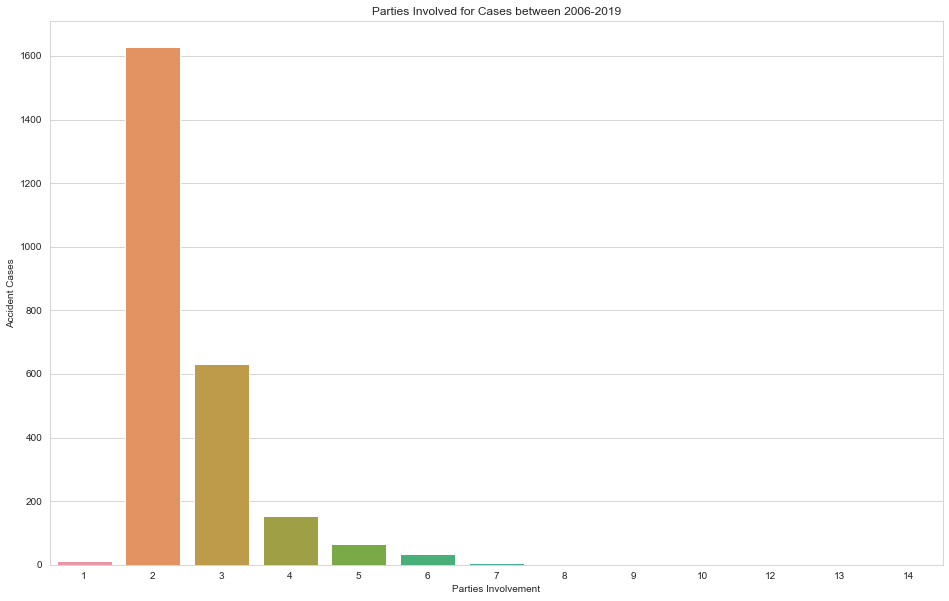

In [43]:
plt.figure(figsize=(16,10))
ax = sns.barplot(x="index", y="count", data=involvement_per_case2)
ax.set_title('Parties Involved for Cases between 2006-2019')
ax.set(xlabel='Parties Involvement', ylabel='Accident Cases')
plt.show();

Question: So, there are 1628 cases that involved 2 parties, and 630 cases that involved 3 parties. What about 11 cases involved only 1 party? "Hit and Run???"

### Cases Per Year

In [44]:
cases_per_year = df.groupby(['YEAR'])['ACCNUM'].nunique()
cases_per_year

YEAR
2006    213
2007    186
2008    183
2009    201
2010    181
2011    186
2012    201
2013    205
2014    145
2015    143
2016    171
2017    167
2018    208
2019    154
Name: ACCNUM, dtype: int64

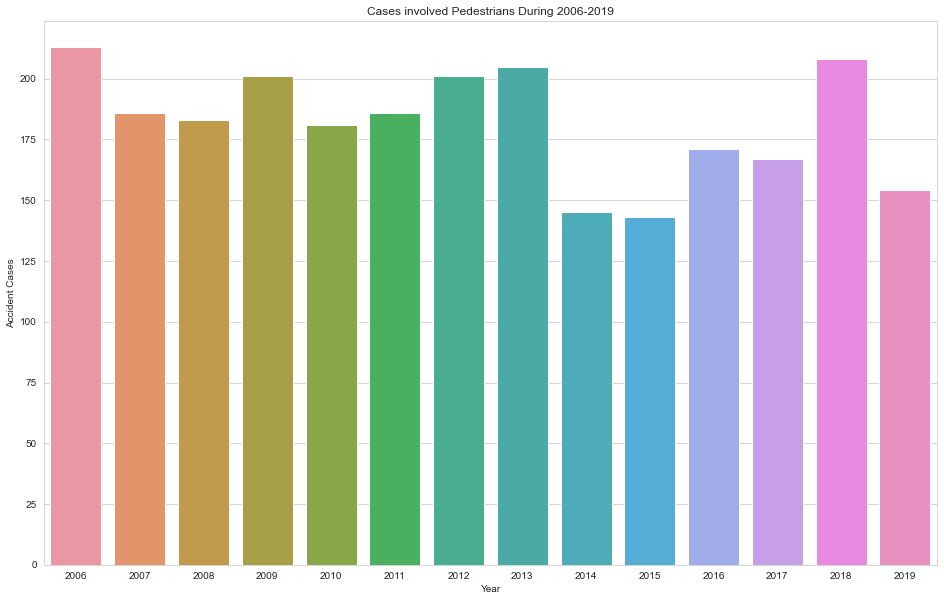

In [45]:
plt.figure(figsize=(16,10))
ax = sns.barplot(cases_per_year.index.values, cases_per_year.values)
ax.set_title('Cases involved Pedestrians During 2006-2019')
ax.set(xlabel='Year', ylabel='Accident Cases')
plt.show();

### Involvements Per Year

In [46]:
involvements_per_year = df.groupby(['YEAR'])['Index_'].count()
involvements_per_year

YEAR
2006    571
2007    510
2008    498
2009    515
2010    481
2011    489
2012    513
2013    547
2014    343
2015    360
2016    416
2017    391
2018    487
2019    363
Name: Index_, dtype: int64

In [47]:
involvements_per_year2 = pd.DataFrame({'count': df.groupby(['YEAR'])['Index_'].count().sort_values(ascending=False)}).reset_index()
involvements_per_year2

YEAR  count
0   2006    571
1   2013    547
2   2009    515
3   2012    513
4   2007    510
5   2008    498
6   2011    489
7   2018    487
8   2010    481
9   2016    416
10  2017    391
11  2019    363
12  2015    360
13  2014    343

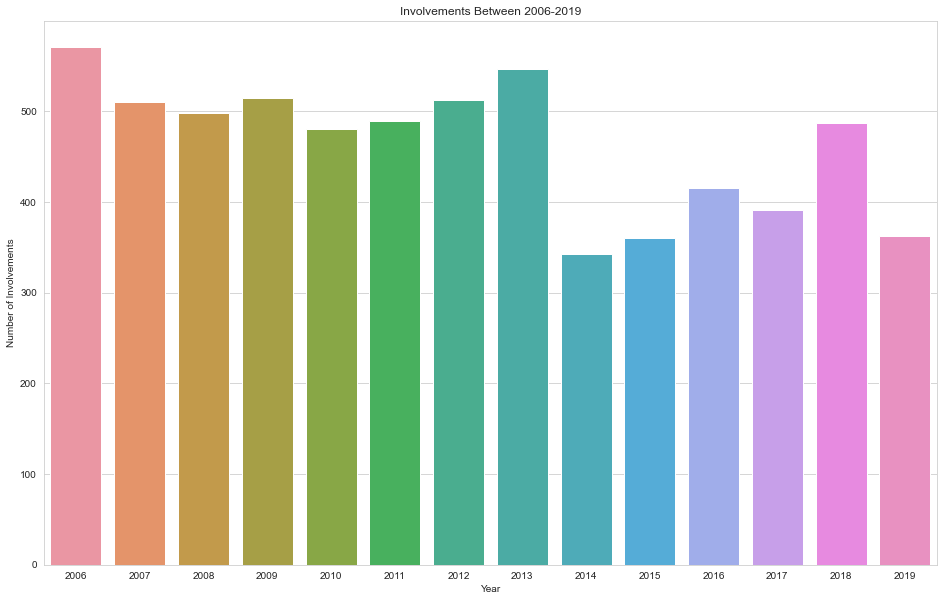

In [48]:
plt.figure(figsize=(16,10))
ax = sns.barplot(involvements_per_year2['YEAR'], involvements_per_year2['count'])
ax.set_title('Involvements Between 2006-2019')
ax.set(xlabel='Year', ylabel='Number of Involvements')
plt.show();

Question: we see there is a significant drop in Pedestrian related accidents starting from 2014, but it start to gain in numbers. Why?

### Cases Per Hour

In [49]:
cases_per_hour = df.groupby(['HOUR'])['ACCNUM'].nunique()
cases_per_hour

HOUR
0       2
1      64
2      70
3      46
4      28
5      39
6     103
7     101
8     118
9     128
10    110
11    107
12    105
13    118
14    126
15    141
16    128
17    171
18    190
19    177
20    145
21    136
22    105
23     86
Name: ACCNUM, dtype: int64

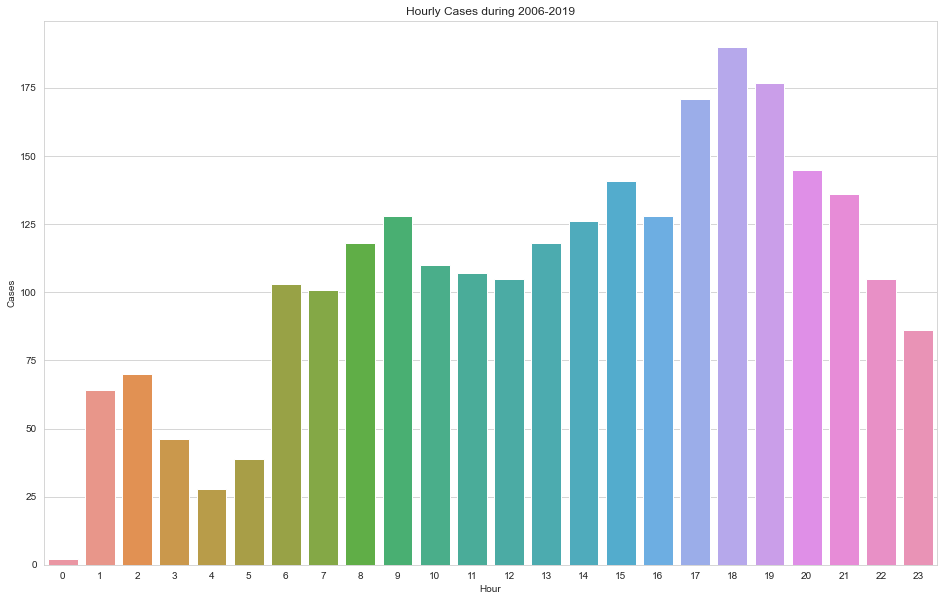

In [50]:
plt.figure(figsize=(16,10))
ax = sns.barplot(cases_per_hour.index.values, cases_per_hour.values)
ax.set_title('Hourly Cases during 2006-2019')
ax.set(xlabel='Hour', ylabel='Cases')
plt.show();

It is also somewhat apparent that evening rush hours has the highest accumulated accident count over 2006-2019. It is recommended that effort should be spent on educating the public to drive more carefully on the way home. (i.e. on radio ads for example)

### Cases per Month

In [51]:
cases_per_month = df.groupby(df['DATE'].dt.month)['ACCNUM'].nunique().sort_index(ascending=True)
# idx = pd.date_range(start='2018-01', freq='M', periods=12)
# month_idx = idx.month_name()
# cases_per_month['month'] = month_idx
cases_per_month

DATE
1     214
2     182
3     190
4     155
5     157
6     218
7     172
8     215
9     220
10    281
11    271
12    269
Name: ACCNUM, dtype: int64

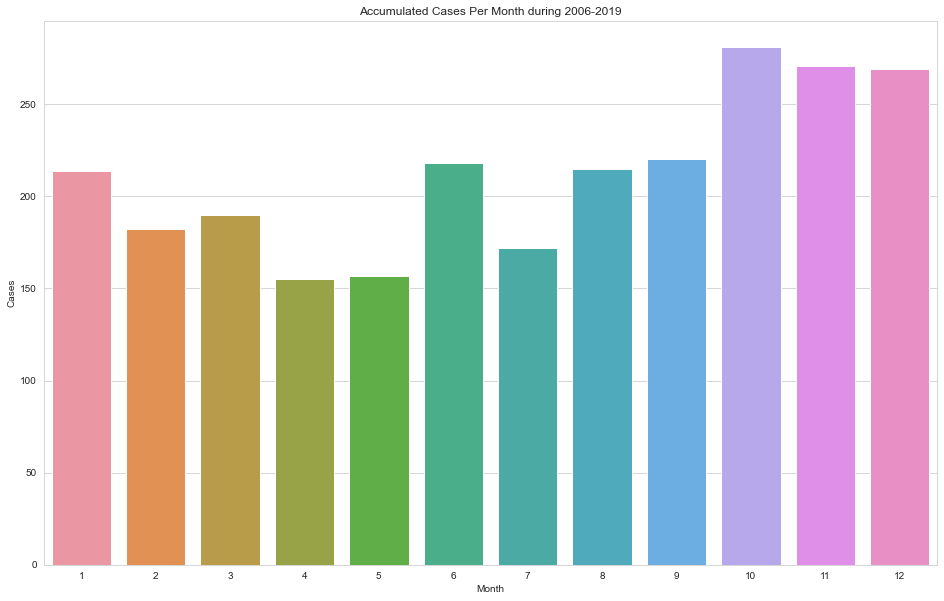

In [52]:
plt.figure(figsize=(16,10))
ax = sns.barplot(cases_per_month.index.values, cases_per_month.values)
ax.set_title('Accumulated Cases Per Month during 2006-2019')
ax.set(xlabel='Month', ylabel='Cases')
plt.show();

It has a significant increase in accidents during October to December. This might be during to the transition into the winter month where people might not be equipped for such changes.

### Cases per Season

see how this gets divided  
https://stackoverflow.com/questions/44124436/python-datetime-to-season

In [53]:
df['SEASON'] = (df['DATE'].dt.month%12 + 3)//3

In [54]:
cases_per_season = df.groupby(['YEAR', 'SEASON'])['ACCNUM'].nunique()
#cases_per_season

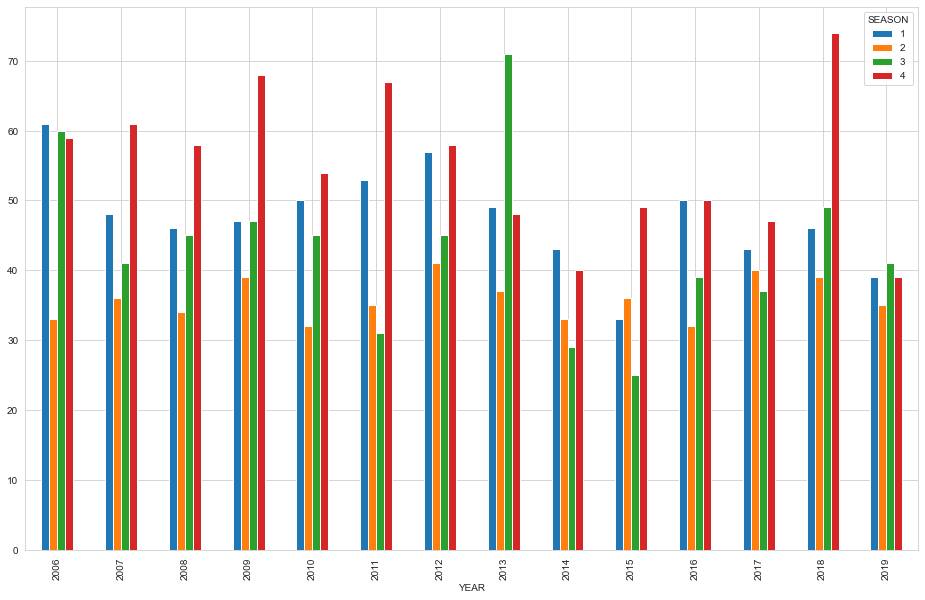

In [55]:
cases_per_season.unstack().plot.bar(figsize=(16,10));

we see that summer has less accidents compared to winter, and it's apparent.

### Cases Per District

In [56]:
cases_per_district = df.groupby('District')['ACCNUM'].nunique().sort_values(ascending=False)
cases_per_district

District
Toronto and East York    950
North York               556
Scarborough              552
Etobicoke York           485
Name: ACCNUM, dtype: int64

Text(0, 0.5, '')

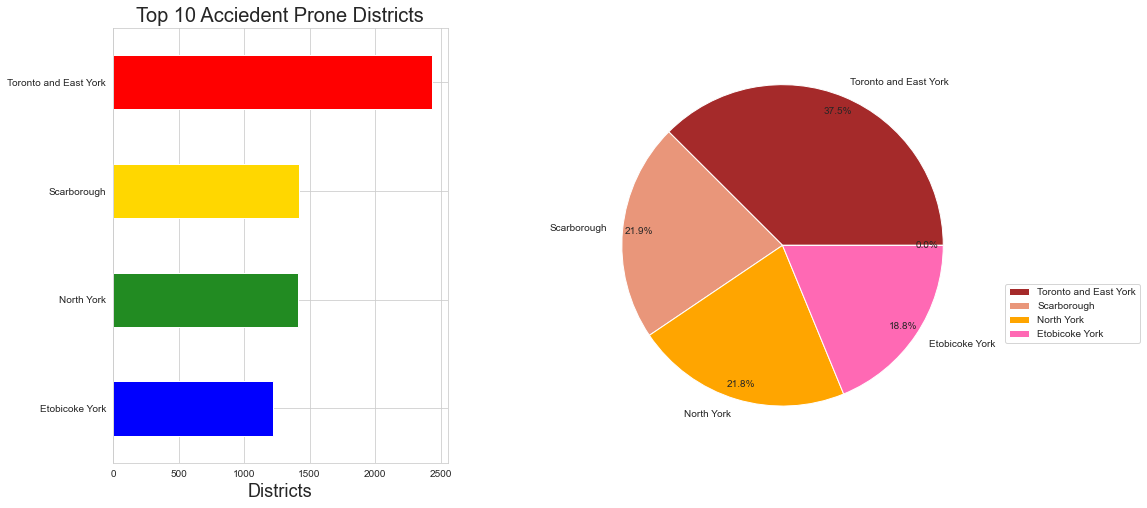

In [57]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
df.District.value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=clr,ax=ax[0])
ax[0].set_title("Top 10 Acciedent Prone Districts",size=20)
ax[0].set_xlabel('Districts',size=18)


count=df['District'].value_counts()
groups=list(df['District'].value_counts().index)[:10]
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
qx = type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4)) 
plt.subplots_adjust(wspace =0.5, hspace =0)
plt.ioff()
plt.ylabel('')

Following Chart can be removed... 

In [58]:
# plt.figure(figsize=(16,10))
# ax = sns.barplot(cases_per_district.index.values, cases_per_district.values)
# ax.set_title('Accumulated Cases Per District during 2006-2019')
# ax.set(xlabel='District', ylabel='Cases')
# plt.show();

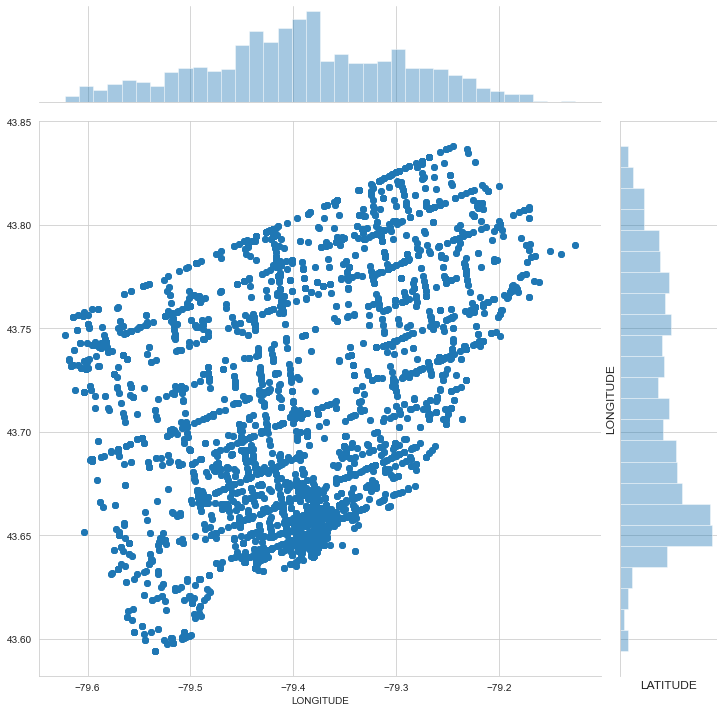

In [59]:
# Accidents based on Latitude and Longitude
sns.jointplot(y=df.LATITUDE.values,x=df.LONGITUDE,height=10)
plt.xlabel('LATITUDE', fontsize=12)
plt.ylabel('LONGITUDE', fontsize=12)
plt.show()

we can see accidents related to pedestrian happened around the downtown core area, as well as major streets

### Cases Per Intersection

Problem:  
when combining 2 columns in to 1 i.e. (df['STREET'] = df['STREET1'] + ' & ' + df['STREET2']), you get different results.  

DUNDAS ST W & BLOOR ST W  -> 5 cases and  
BLOOR ST W & DUNDAS ST W  -> 5 (another 5 )  

where this should be consider 10 cases in total. We have to remap those Street into one entity.  

This code does not work  
df['STREET'] = df['STREET1'] + ' & ' + df['STREET2']  
cases_per_intersection = df.groupby(df['STREET'])['ACCNUM'].nunique().sort_values(ascending=False)  
cases_per_intersection  


see this as an example:  

https://stackoverflow.com/questions/60313006/mapping-of-multiple-columns-categorical-values-in-pandas

In [60]:
df['STREET1_MOD'] = df['STREET1'].str.upper()
df['STREET2_MOD'] = df['STREET2'].str.upper()
stacked = df[['STREET1_MOD', 'STREET2_MOD']].stack()

In [61]:
codes, uniques = pd.factorize(stacked, sort=True)
print('codes: ', codes)
print('uniques:', uniques)

codes:  [ 346  707  346 ... 1465 1110 1735]
uniques: Index(['1 AUTUMN AVE', '1 MASSEY SQ', '100 STEELES AVE W',
       '100 STEELES AVEN W', '1000 GERRARD ST E', '1035 SHEPPARD AVE W',
       '1048 BLOOR ST W', '1058 GERRARD ST E', '1071 QUEEN ST W',
       '1092 KEELE ST',
       ...
       'YORK GATE BLVD', 'YORK MILLS RD', 'YORK ST',
       'YORK ST GARDINER W  RAMP', 'YORK STREET', 'YORKDALE RD', 'YORKLAND RD',
       'YORKVILLE AVE', 'YORKWOODS GT', 'ZENITH DR'],
      dtype='object', length=1912)


In [62]:
df['STREET1_MOD'] = pd.Categorical(df['STREET1_MOD'], categories=uniques)
df['STREET2_MOD'] = pd.Categorical(df['STREET2_MOD'], categories=uniques)
df['STREET1_cc'] = df['STREET1_MOD'].cat.codes
df['STREET2_cc'] = df['STREET2_MOD'].cat.codes
df['STREET12'] = df['STREET1'] + ' & ' + df['STREET2']

So, now we have unique numbers for the street's identifiers, we can combine their codes by union them together. Since AB = BA (commutative), we will multiple the two integers together.

In [63]:
df['STREET_U'] = df['STREET1_cc'].astype(int) * df['STREET2_cc'].astype(int)
#df['STREET_U']

In [64]:
# check the columns
# test = df[(df['STREET1'] == 'DUNDAS ST W') | (df['STREET2'] == 'DUNDAS ST W')][['STREET1_cc', 'STREET2_cc', 'STREET1', 'STREET2', 'STREET_U']]
# test

In [65]:
# df.STREET_U.value_counts()

In [66]:
cases_per_intersection = df.groupby(['STREET_U'])['ACCNUM'].nunique().sort_values(ascending=False)
#cases_per_intersection

In [67]:
def get_street_name(val):
    filter = df['STREET_U']==val
    a = df[filter]
    st = a.iloc[0]['STREET12']
    return str(st)

In [68]:
# check to see if we can convert identifer back to intersection name
st_name = get_street_name(294819)
st_name

'BLOOR ST W & DUNDAS ST W'

In [69]:
cases_per_intersection2 = pd.DataFrame({ 'count': df.groupby(['STREET_U'])['ACCNUM'].nunique().sort_values(ascending=False)}).reset_index()
#cases_per_intersection2

In [70]:
cases_per_intersection2['STREET_NAME'] = cases_per_intersection2.STREET_U.apply(lambda x: get_street_name(x))
cases_per_intersection2[:10]

STREET_U  count                   STREET_NAME
0    294819     11      BLOOR ST W & DUNDAS ST W
1    942750      6  MIDLAND AVE & EGLINTON AVE E
2    738476      5       JARVIS ST & DUNDAS ST E
3   1389900      5   LAWRENCE AVE E & MCCOWAN RD
4   2619742      5   QUEEN St W & UNIVERSITY Ave
5   1137366      5   DUNDAS ST E & SHERBOURNE ST
6    693753      5      ISLINGTON AVE & DIXON RD
7   1157175      5  DUFFERIN ST & ST CLAIR AVE W
8    586124      5   STEELES AVE W & BATHURST ST
9   1506714      5       FINCH AVE W & WESTON RD

In [71]:
cpi_filtered = cases_per_intersection2[cases_per_intersection2['count'] >= 4]

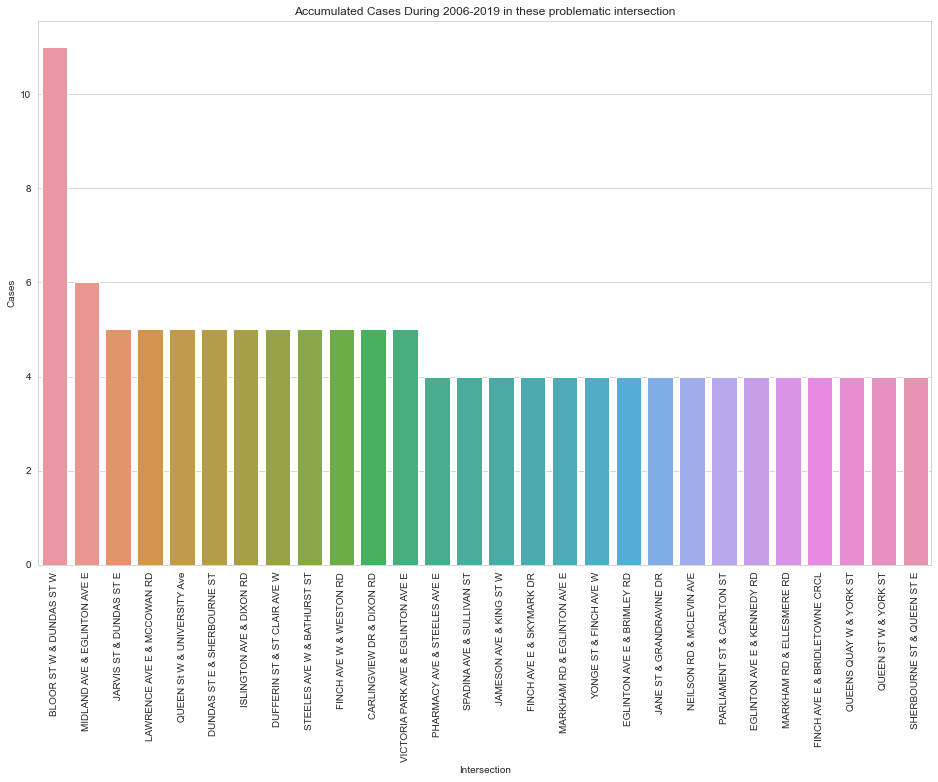

In [72]:
plt.figure(figsize=(16,10))
ax = sns.barplot(x="STREET_NAME", y="count", data=cpi_filtered)
ax.set_title('Accumulated Cases During 2006-2019 in these problematic intersection')
ax.set(xlabel='Intersection', ylabel='Cases')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show();

we can put more efforts in these problematic intersections to prevent pedestrian accidents.

### Cases Per Neighbourhood

#### Obtain a dictionary type for neighbourhood name
where you get key, value pair for neighbourhood {id: name}

In [73]:
def convert_index_to_dict(string_list):
    dct = dict()
    for s in string_list:
        res = s[s.find("(")+1:s.find(")")]
        a = int(res)
        t = s[:s.find(" (")]
        dct[a] = str(t)
    return dct

In [74]:
hood_series = df['Neighbourhood'].unique()

need to fix one value with multiple brackets

In [75]:
hood_series[hood_series == 'Mimico (includes Humber Bay Shores) (17)'] = 'Mimico includes Humber Bay Shores (17)'

In [76]:
hood_list = hood_series.tolist()
hood_dict = convert_index_to_dict(hood_list)
#hood_dict

In [77]:
hood_dict[97]

'Yonge-St.Clair'

now we extract data from df to a variable to prep for plotting

In [78]:
cases_per_neighbourhood = df.groupby('Hood_ID')['ACCNUM'].nunique().sort_values(ascending=False)
#cases_per_neighbourhood

In [79]:
cases_per_neighbourhood2 = pd.DataFrame({ 'count': cases_per_neighbourhood}).reset_index()
#cases_per_neighbourhood2

In [80]:
cases_per_neighbourhood2.describe()

Hood_ID       count
count  139.000000  139.000000
mean    70.187050   18.302158
std     40.535289   13.851518
min      1.000000    3.000000
25%     35.500000    9.000000
50%     70.000000   14.000000
75%    104.500000   23.500000
max    140.000000   88.000000

there are too many neighbourhoods to plot, we will limit the upper 75% tile to plot

In [81]:
cpn_filtered = cases_per_neighbourhood2[ cases_per_neighbourhood2['count'] > 23 ]

looking up the neighbourhood name here

In [82]:
cpn_filtered['Hood_Name'] = cpn_filtered.Hood_ID.apply(lambda x: hood_dict[x])

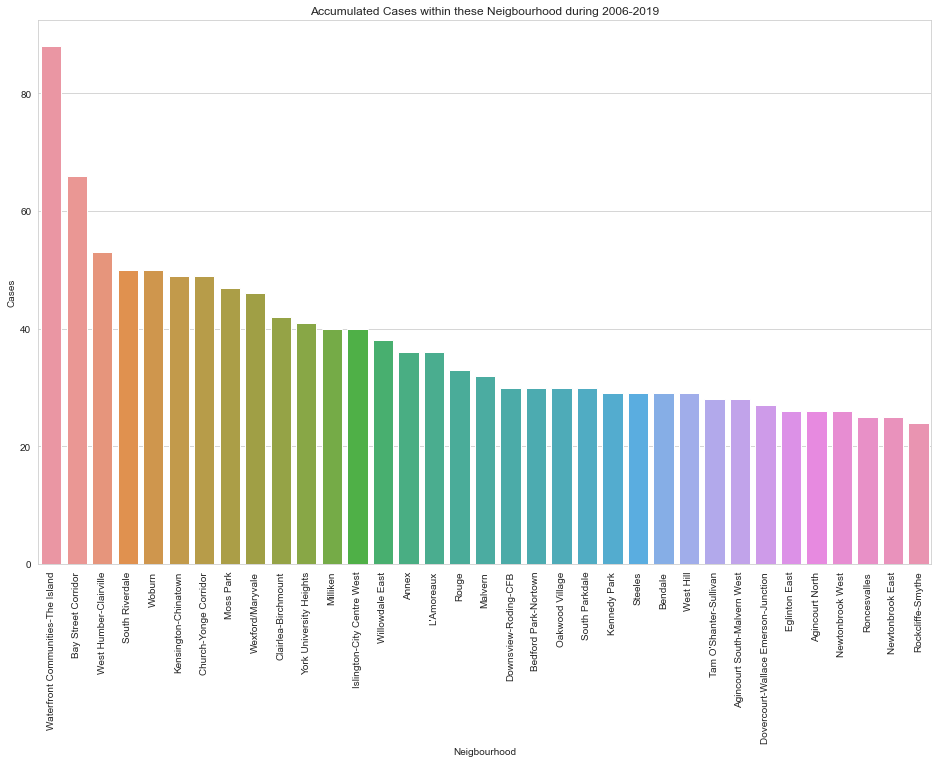

In [83]:
plt.figure(figsize=(16,10))
ax = sns.barplot(x="Hood_Name", y="count", data=cpn_filtered)
ax.set_title('Accumulated Cases within these Neigbourhood during 2006-2019')
ax.set(xlabel='Neigbourhood', ylabel='Cases')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show();

### Latitude and Longitutde

STEPS TO VISUALIZE MAPS HERE, install this into conda  
```
$ pip install ipywidgets  
$ pip install keplergl  
$ jupyter nbextension install --py --sys-prefix keplergl  
```

In [84]:
import pandas as pd
from keplergl import KeplerGl
import geopandas as gpd

In [85]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.LONGITUDE, df.LATITUDE))
map = KeplerGl(height=600, width=800)
map.add_data(data=gdf, name="accident")
map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'accident': {'index': [Timestamp('2006-01-02 07:05:00'), Timestamp('2006-01-02 07:05:00'), Time…

#TONY: let's do some more with this map.

Refer to this tutorial: 
https://towardsdatascience.com/kepler-gl-jupyter-notebooks-geospatial-data-visualization-with-ubers-opensource-kepler-gl-b1c2423d066f

In [150]:
road_class = df.ROAD_CLASS.value_counts().sort_values(ascending=False)
road_class

Major Arterial    4722
Minor Arterial     970
Collector          379
Local              349
Expressway          13
Other               10
Laneway              8
Pending              6
Name: ROAD_CLASS, dtype: int64

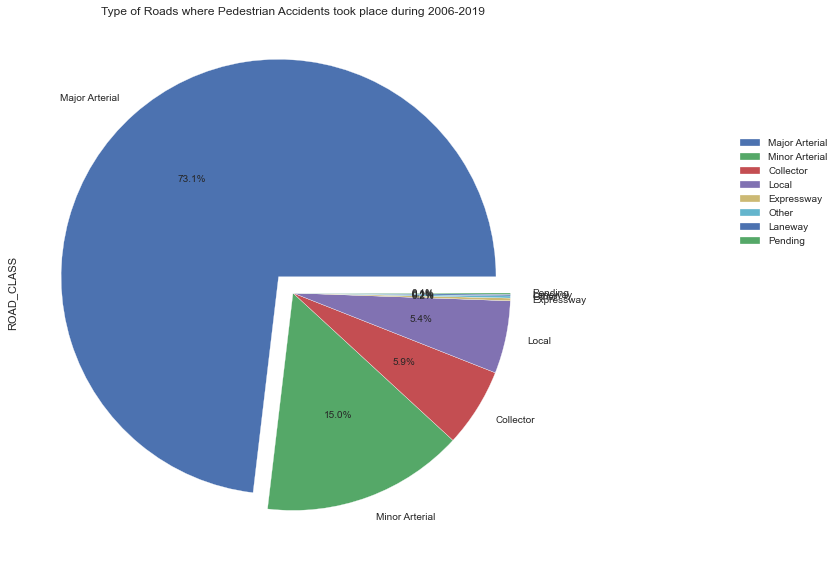

In [152]:
plt.figure(figsize=(16,10))
ax = road_class.plot.pie(explode=[0.1,0,0,0,0,0,0,0],autopct='%1.1f%%')
ax.set_title('Type of Roads where Pedestrian Accidents took place during 2006-2019')
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

### LOCCOORD

In [86]:
location_coordiate = df.LOCCOORD.value_counts().sort_values(ascending=False)
location_coordiate

Intersection    4436
Mid-Block       2010
Name: LOCCOORD, dtype: int64

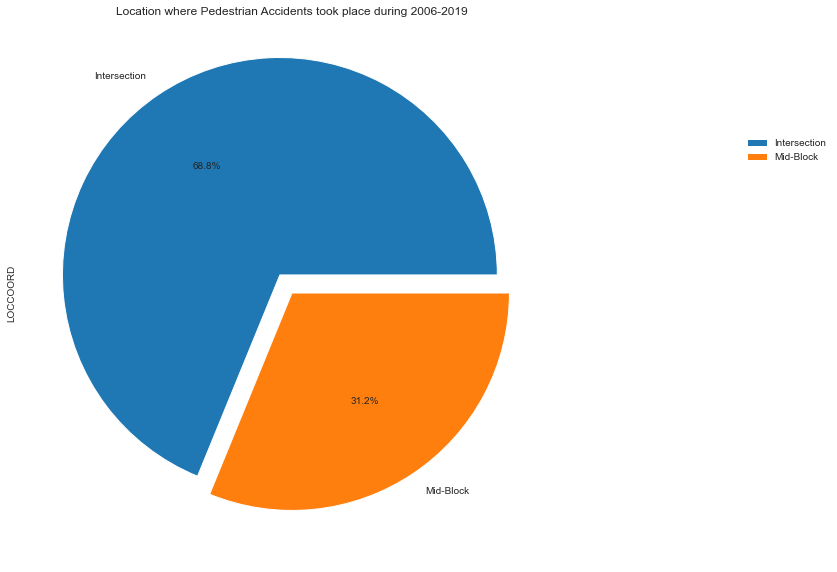

In [87]:
plt.figure(figsize=(16,10))
ax = location_coordiate.plot.pie(explode=[0.1,0],autopct='%1.1f%%')
ax.set_title('Location where Pedestrian Accidents took place during 2006-2019')
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

### ACCLOC

In [88]:
accident_location = df.ACCLOC.value_counts().sort_values(ascending=False)
accident_location

At Intersection          3124
Non Intersection          718
Intersection Related      430
At/Near Private Drive      96
Laneway                    13
Private Driveway            6
Overpass or Bridge          4
Name: ACCLOC, dtype: int64

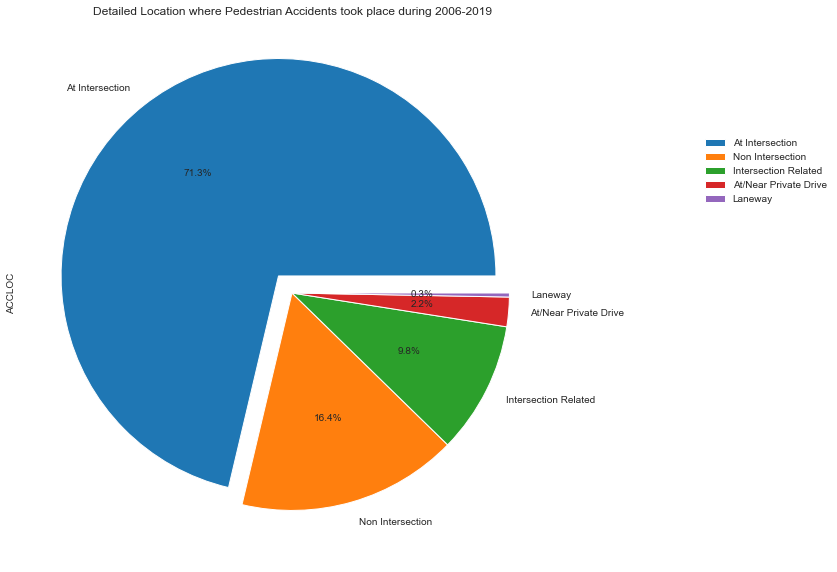

In [89]:
plt.figure(figsize=(16,10))
ax = accident_location.iloc[:5].plot.pie(explode=[0.1,0,0,0,0],autopct='%1.1f%%')
ax.set_title('Detailed Location where Pedestrian Accidents took place during 2006-2019')
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

In [90]:
traffic_control = df.TRAFFCTL.value_counts().sort_values(ascending=False)
traffic_control

No Control              3035
Traffic Signal          2813
Stop Sign                436
Pedestrian Crossover     139
Traffic Controller        20
Streetcar (Stop for)      16
Yield Sign                 7
Traffic Gate               5
PXO - No Ped               2
Police Control             2
School Guard               2
Name: TRAFFCTL, dtype: int64

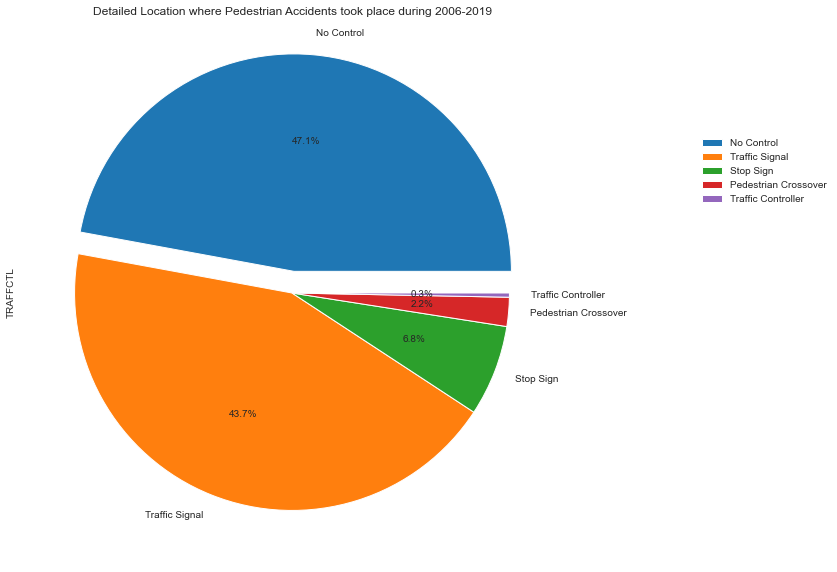

In [91]:
plt.figure(figsize=(16,10))
ax = traffic_control.iloc[:5].plot.pie(explode=[0.1,0,0,0,0],autopct='%1.1f%%')
ax.set_title('Detailed Location where Pedestrian Accidents took place during 2006-2019')
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

# Road Conditions

## Visibility

In [92]:
visibility_condition = df.VISIBILITY.value_counts().sort_values(ascending=False)
visibility_condition

Clear                     5308
Rain                       968
Snow                       112
Other                       40
Fog, Mist, Smoke, Dust      16
Freezing Rain               12
Strong wind                  8
Drifting Snow                6
Name: VISIBILITY, dtype: int64

In [93]:
# plt.figure(figsize=(16,10))
# ax=sns.barplot(visibility_condition.values, visibility_condition.index.values)
# ax.set_title('Road Condition - Visibility (2006-2019)')
# ax.set(ylabel='Visibility', xlabel='Involvements')
# # ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# plt.show();

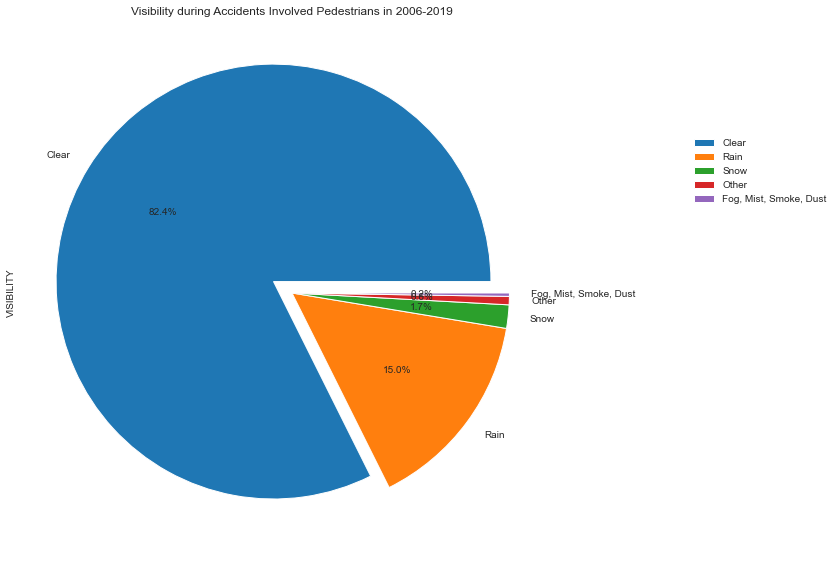

In [94]:
plt.figure(figsize=(16,10))
ax = visibility_condition.iloc[:5].plot.pie(explode=[0.1,0,0,0,0],autopct='%1.1f%%')
ax.set_title('Visibility during Accidents Involved Pedestrians in 2006-2019')
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

In [95]:
light_condition = df.LIGHT.value_counts().sort_values(ascending=False)
light_condition

Daylight                3478
Dark                    1488
Dark, artificial        1170
Dusk                     112
Dusk, artificial          86
Daylight, artificial      57
Dawn, artificial          52
Dawn                      39
Other                      2
Name: LIGHT, dtype: int64

In [96]:
# plt.figure(figsize=(16,10))
# ax = sns.barplot(light_condition.values, light_condition.index)
# ax.set_title('Road Condition - Light (2006-2019)')
# ax.set(ylabel='Light Condition', xlabel='Involvements')
# # ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# plt.show();

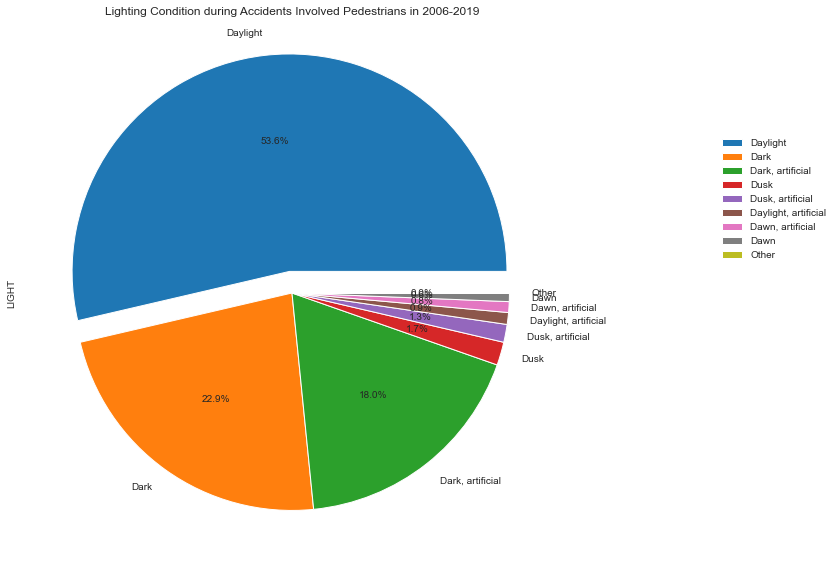

In [97]:
plt.figure(figsize=(16,10))
ax = light_condition.plot.pie(explode=[0.1,0,0,0,0,0,0,0,0],autopct='%1.1f%%')
ax.set_title('Lighting Condition during Accidents Involved Pedestrians in 2006-2019')
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

In [98]:
road_surface_condition = df.RDSFCOND.value_counts().sort_values(ascending=False)
road_surface_condition

Dry                     4897
Wet                     1410
Other                     61
Loose Snow                36
Slush                     35
Ice                       17
Packed Snow               13
Loose Sand or Gravel       3
Name: RDSFCOND, dtype: int64

In [99]:
# plt.figure(figsize=(16,10))
# ax = sns.barplot(road_surface_condition.values, road_surface_condition.index)
# ax.set_title('Road Condition - Road Surface (2006-2019)')
# ax.set(ylabel='Road Surface Condition', xlabel='Involvements')
# # ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# plt.show();

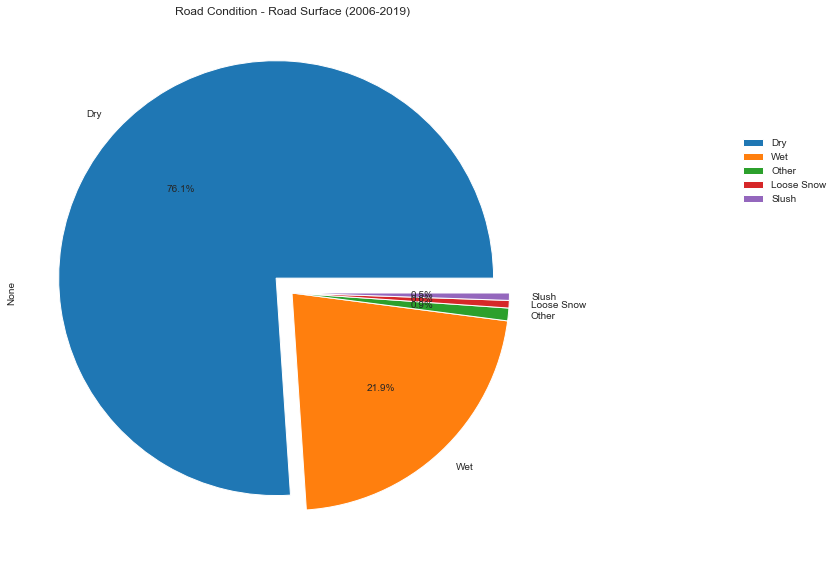

In [100]:
plt.figure(figsize=(16,10))
ax = df.groupby('RDSFCOND').size().sort_values(ascending=False).iloc[:5].plot.pie(explode=[0.1,0,0,0,0],autopct='%1.1f%%')
ax.set_title('Road Condition - Road Surface (2006-2019)')
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

## Accident Class

This is segregate accidents into fatal/non-fatal. We will use time to see how it affects fatality

### Accident Class

In [101]:
accidents = df.ACCLASS.value_counts().sort_index(ascending=True)
accidents

False    5322
True     1162
Name: ACCLASS, dtype: int64

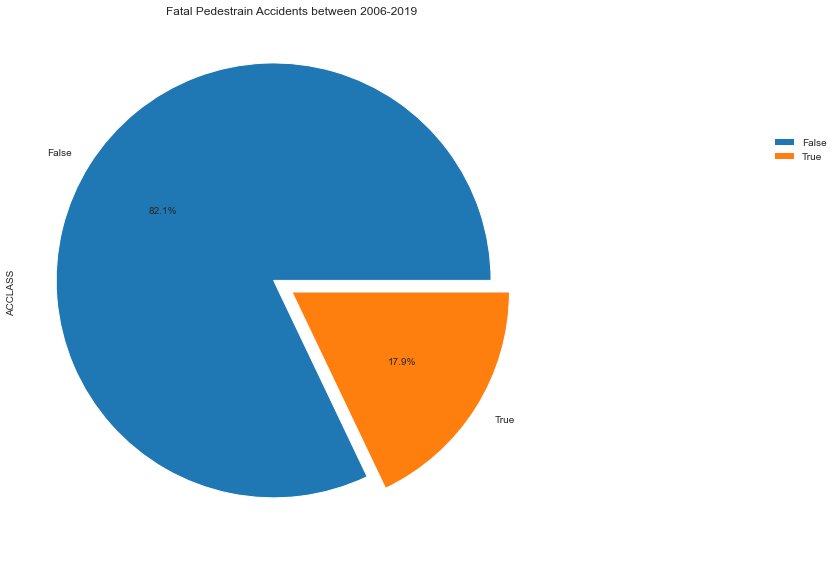

In [102]:
plt.figure(figsize=(16,10))
ax = accidents.plot.pie(explode=[0.1,0],autopct='%1.1f%%')
ax.set_title('Fatal Pedestrain Accidents between 2006-2019')
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

This is a very important matrix to judge later on in the study. ~18% Fatality is a nominal value for most cases.

In [103]:
fatality_over_year = df.groupby(df.DATE.dt.year)['ACCLASS'].value_counts()
fatality_over_year

DATE  ACCLASS
2006  False      490
      True        81
2007  False      434
      True        76
2008  False      416
      True        82
2009  False      433
      True        82
2010  False      421
      True        60
2011  False      437
      True        52
2012  False      446
      True        67
2013  False      411
      True       136
2014  False      268
      True        75
2015  False      269
      True        91
2016  False      310
      True       106
2017  False      309
      True        82
2018  False      396
      True        91
2019  False      282
      True        81
Name: ACCLASS, dtype: int64

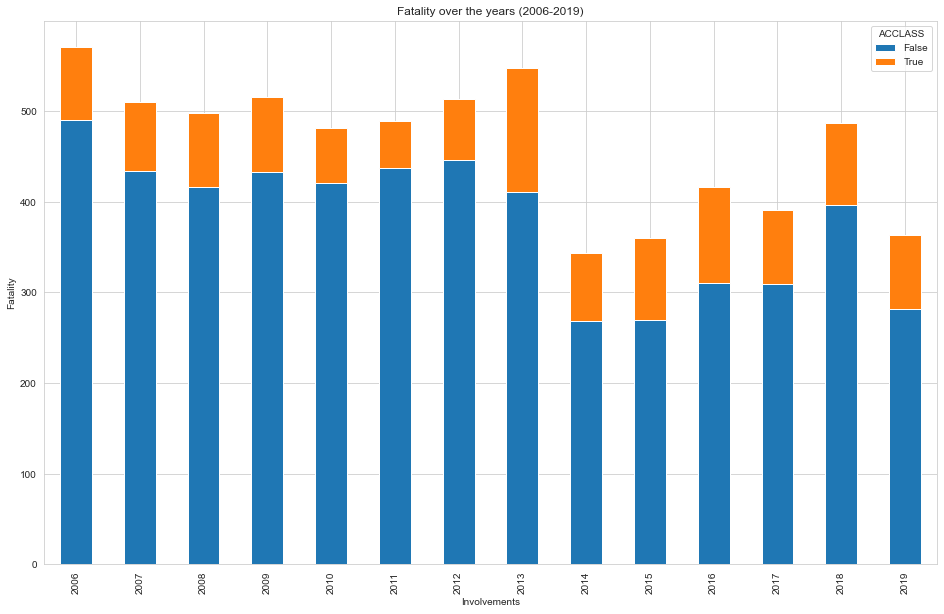

In [104]:
ax = fatality_over_year.unstack().plot.bar(stacked=True, figsize=(16,10))
ax.set_title('Fatality over the years (2006-2019)')
ax.set(ylabel='Fatality', xlabel='Involvements')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show();

In [105]:
fatality_by_month = df.groupby(df.DATE.dt.month)['ACCLASS'].value_counts()
fatality_by_month

DATE  ACCLASS
1     False      396
      True       129
2     False      398
      True        71
3     False      389
      True        83
4     False      330
      True        58
5     False      338
      True        65
6     False      495
      True        87
7     False      343
      True       124
8     False      471
      True       116
9     False      447
      True        98
10    False      643
      True        98
11    False      537
      True       119
12    False      535
      True       114
Name: ACCLASS, dtype: int64

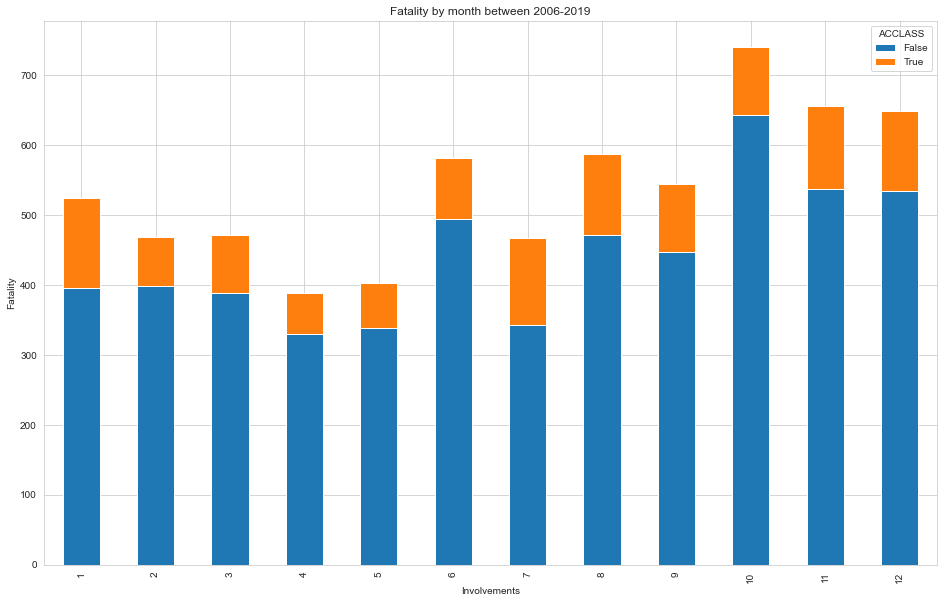

In [106]:
ax = fatality_by_month.unstack().plot.bar(stacked=True, figsize=(16,10))
ax.set_title('Fatality by month between 2006-2019')
ax.set(ylabel='Fatality', xlabel='Involvements')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show();

In [107]:
fatality_by_hour = df.groupby(df.HOUR)['ACCLASS'].value_counts()
fatality_by_hour

HOUR  ACCLASS
0     False        3
      True         3
1     False      139
      True        32
2     False      177
      True        23
3     False       92
      True        18
4     False       64
      True        10
5     False       66
      True        34
6     False      187
      True        59
7     False      196
      True        52
8     False      263
      True        33
9     False      248
      True        54
10    False      211
      True        69
11    False      224
      True        60
12    False      221
      True        63
13    False      250
      True        66
14    False      268
      True        69
15    False      326
      True        34
16    False      282
      True        59
17    False      333
      True        78
18    False      395
      True        84
19    False      381
      True        61
20    False      299
      True        78
21    False      285
      True        61
22    False      232
      True        33
23    False      180

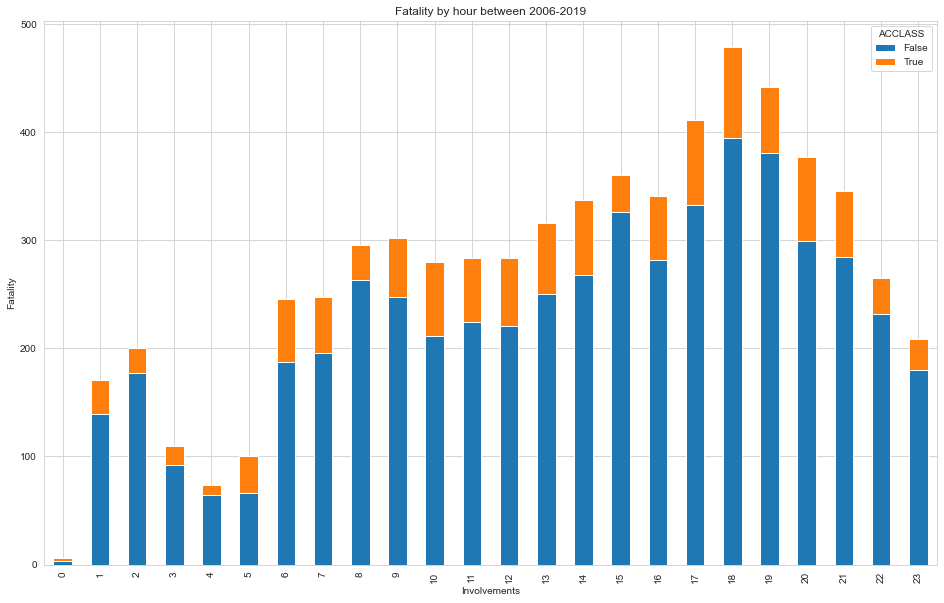

In [108]:
ax = fatality_by_hour.unstack().plot.bar(stacked=True, figsize=(16,10))
ax.set_title('Fatality by hour between 2006-2019')
ax.set(ylabel='Fatality', xlabel='Involvements')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show();

## Involvement Class

### Involvement Type

In [109]:
involvement_type = df.INVTYPE.value_counts().sort_values(ascending=False)
involvement_type
#involvement_type2 = pd.DataFrame({'COUNT': involvement_type}).reset_index()
#involvement_type2.columns = ['INVTYPE', 'COUNT']
#involvement_type2

Pedestrian              2715
Driver                  2557
Vehicle Owner            565
Passenger                390
Truck Driver             114
Other                     45
Other Property Owner      28
Motorcycle Driver         22
Cyclist                   15
Wheelchair                13
Driver - Not Hit           5
In-Line Skater             5
Pedestrian - Not Hit       1
Trailer Owner              1
Witness                    1
Name: INVTYPE, dtype: int64

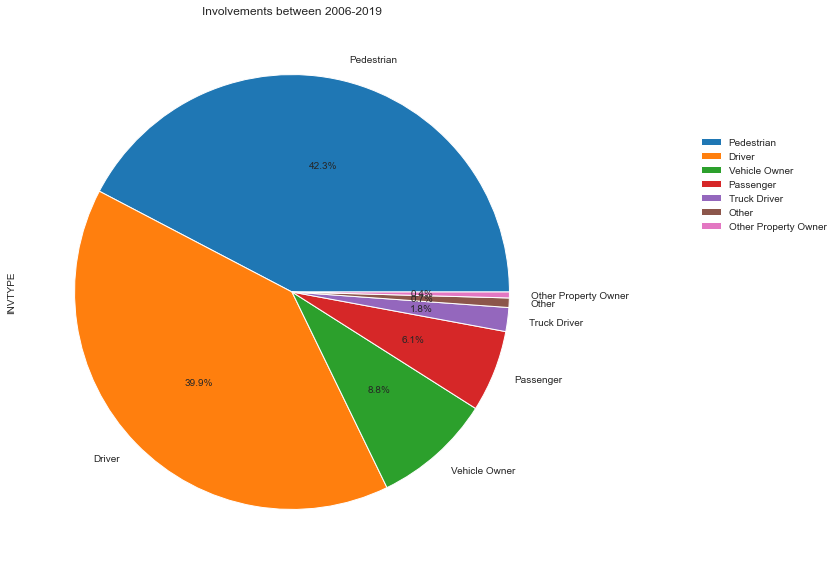

In [110]:
plt.figure(figsize=(16,10))
ax = involvement_type.iloc[:7].plot.pie(autopct='%1.1f%%')
ax.set_title('Involvements between 2006-2019')
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

In [111]:
## Old implmentation -> Each Case has multiple involvements... 

In [112]:
# Class = df.INVTYPE.unique()
# count_by_class=[]
# for i in df.INVTYPE.unique():
#     count_by_class.append(df[df['INVTYPE']==i].count()['ACCNUM'])

In [113]:
## Accidents Class
# plt.figure(figsize=(16,10))
# ax = sns.barplot(Class,count_by_class)
# ax.set_title('Number of Involvements within Various Classes (2006-2019)')
# ax.set(xlabel='Involvement Type', ylabel='Number of Involvements')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# plt.show();

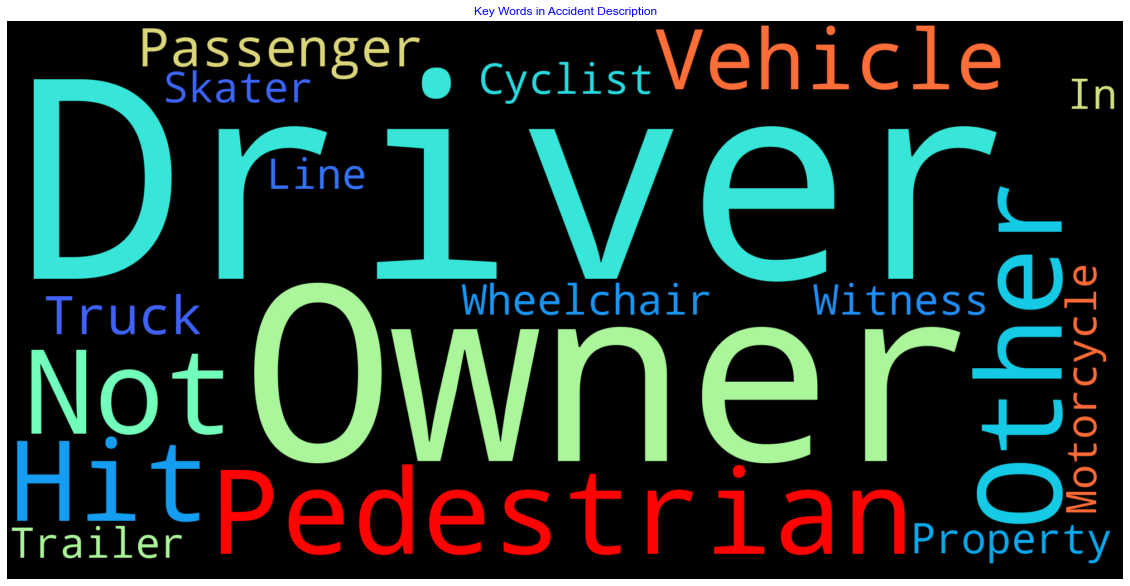

In [114]:
from wordcloud import WordCloud
plt.style.use('seaborn')
wrds1 = df["INVTYPE"].str.split("(").str[0].value_counts().keys()

wc1 = WordCloud(scale=5,max_words=1000,colormap="rainbow",background_color="black").generate(" ".join(wrds1))
plt.figure(figsize=(20,14))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Key Words in Accident Description",color='b')
plt.show();

### Involvement Age

In [115]:
involvement_age = df.INVAGE_cc.value_counts().sort_index(ascending=True)
#involvement_age

In [116]:
involvement_age2 = pd.DataFrame({'count': involvement_age}).reset_index()
involvement_age2['INVAGE_NAME'] = involvement_age.index.map(lambda x: age_list_index[x])
#involvement_age2

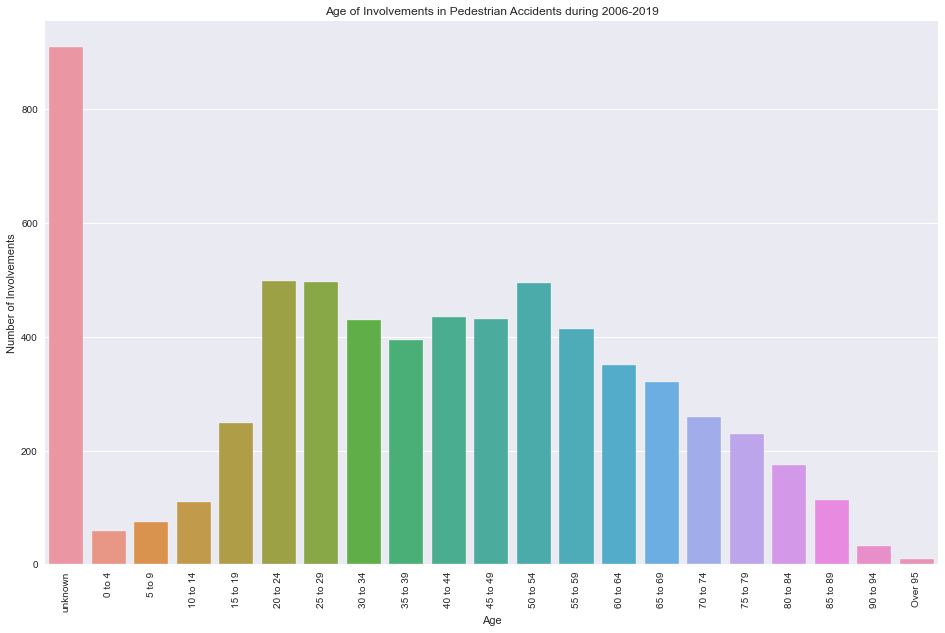

In [117]:
plt.figure(figsize=(16,10))
ax = sns.barplot(x="INVAGE_NAME", y="count", data=involvement_age2)
ax.set_title('Age of Involvements in Pedestrian Accidents during 2006-2019')
ax.set(xlabel='Age', ylabel='Number of Involvements')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show();

### Severity of Injury (INJURY)

In [118]:
severity_of_injury = df.INJURY.value_counts().sort_values(ascending=False)
severity_of_injury

None       2959
Major      2195
Fatal       445
Minor       180
Minimal     141
Name: INJURY, dtype: int64

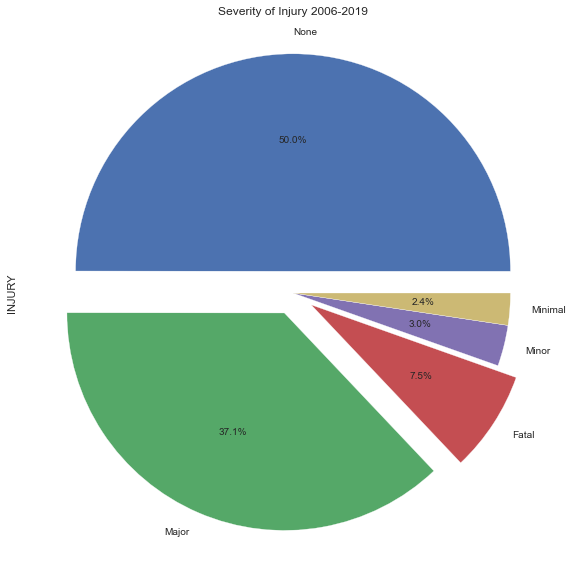

In [153]:
plt.figure(figsize=(16,10))
ax = severity_of_injury.plot.pie(explode=[0.1,0.1,0.1,0,0],autopct='%1.1f%%')
ax.set_title('Severity of Injury 2006-2019')
# ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

## Vehicle Related

### INITDIR

INITDIR needs other context to be useful. We will look at this later on.

### VEHTYPE

In [120]:
vehicle_type = df.VEHTYPE.value_counts().sort_values(ascending=False)
vehicle_type

Other                               2329
Automobile, Station Wagon           2241
Municipal Transit Bus (TTC)          119
Pick Up Truck                         70
Truck - Open                          68
Passenger Van                         44
Delivery Van                          31
Street Car                            26
Truck - Closed (Blazer, etc)          22
Motorcycle                            22
Bicycle                               15
Taxi                                  13
Truck - Dump                          12
Truck-Tractor                         11
Truck - Tank                           5
Bus (Other) (Go Bus, Gray Coach)       5
Intercity Bus                          4
Truck (other)                          4
Construction Equipment                 2
Fire Vehicle                           1
Truck - Car Carrier                    1
Police Vehicle                         1
School Bus                             1
Name: VEHTYPE, dtype: int64

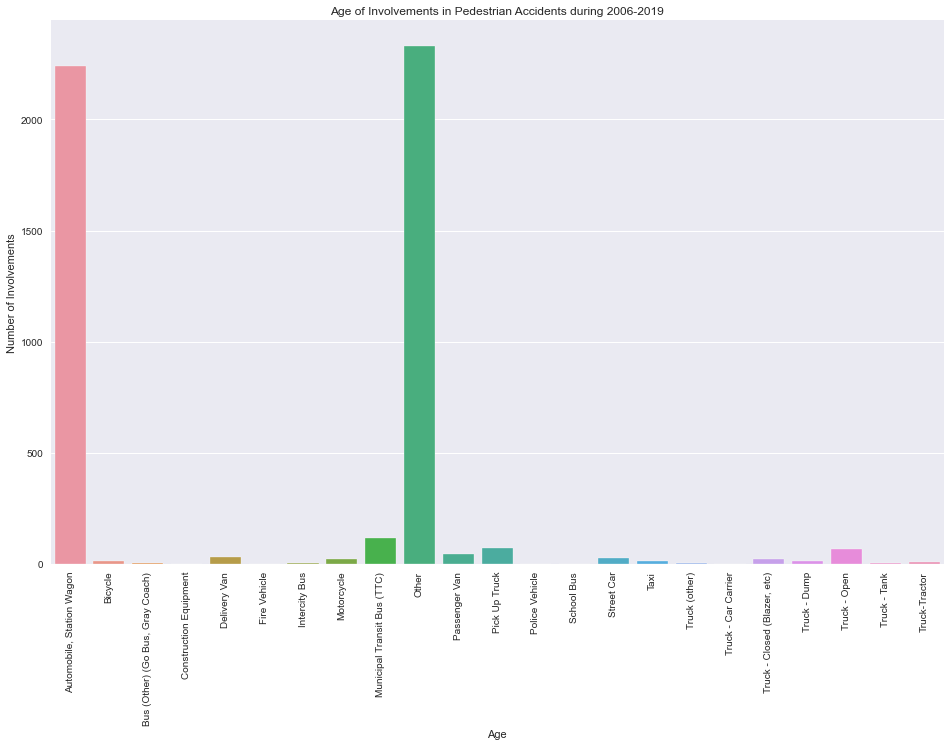

In [121]:
plt.figure(figsize=(16,10))
ax = sns.barplot(vehicle_type.index.values, vehicle_type.values)
ax.set_title('Age of Involvements in Pedestrian Accidents during 2006-2019')
ax.set(xlabel='Age', ylabel='Number of Involvements')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show();

not very useful in term of analysis

### MANOEUVER

In [122]:
driver_manoeuver = df.MANOEUVER.value_counts().reset_index()
driver_manoeuver.columns = ['MANOEUVER', 'COUNT']
driver_manoeuver = driver_manoeuver.sort_values('COUNT', ascending=False).reset_index(drop=True)
driver_manoeuver

MANOEUVER  COUNT
0                           Going Ahead   1577
1                          Turning Left    670
2                         Turning Right    209
3                             Reversing     85
4                                 Other     83
5                               Unknown     51
6                               Stopped     47
7                   Slowing or Stopping     42
8                        Changing Lanes     35
9                                Parked     25
10   Pulling Away from Shoulder or Curb     14
11                        Making U Turn      9
12                           Overtaking      8
13                             Disabled      3
14                              Merging      2
15  Pulling Onto Shoulder or towardCurb      1

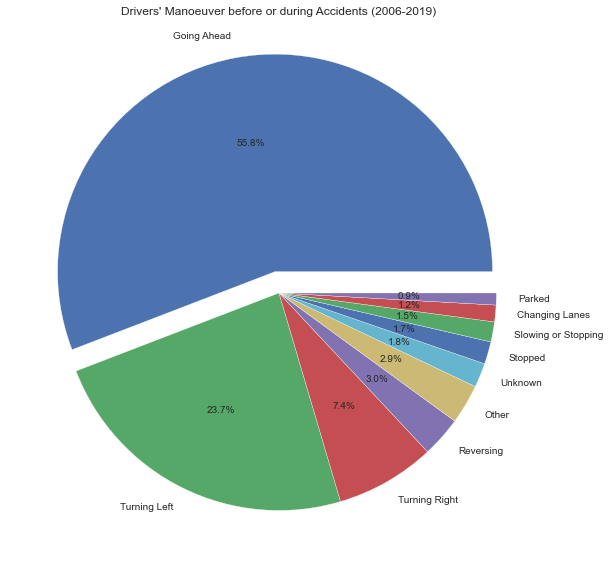

In [123]:
driver_manoeuver2 = driver_manoeuver.iloc[:10]
explode = (0.1,0,0,0,0,0,0,0,0,0)

fig, ax = plt.subplots(1,1, figsize=(16,10))
ax.pie(driver_manoeuver2.COUNT, explode=explode, labels=driver_manoeuver2.MANOEUVER, autopct='%1.1f%%')
ax.set_title('Drivers\' Manoeuver before or during Accidents (2006-2019)')
#ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.style.use('seaborn')
plt.show()

### DRIVACT

In [124]:
drivers_action = df.DRIVACT.value_counts()
drivers_action

Driving Properly                1276
Failed to Yield Right of Way     802
Other                            189
Improper Turn                    101
Lost control                      95
Disobeyed Traffic Control         94
Exceeding Speed Limit             38
Speed too Fast For Condition      24
Improper Passing                  15
Improper Lane Change              14
Following too Close                9
Wrong Way on One Way Road          4
Name: DRIVACT, dtype: int64

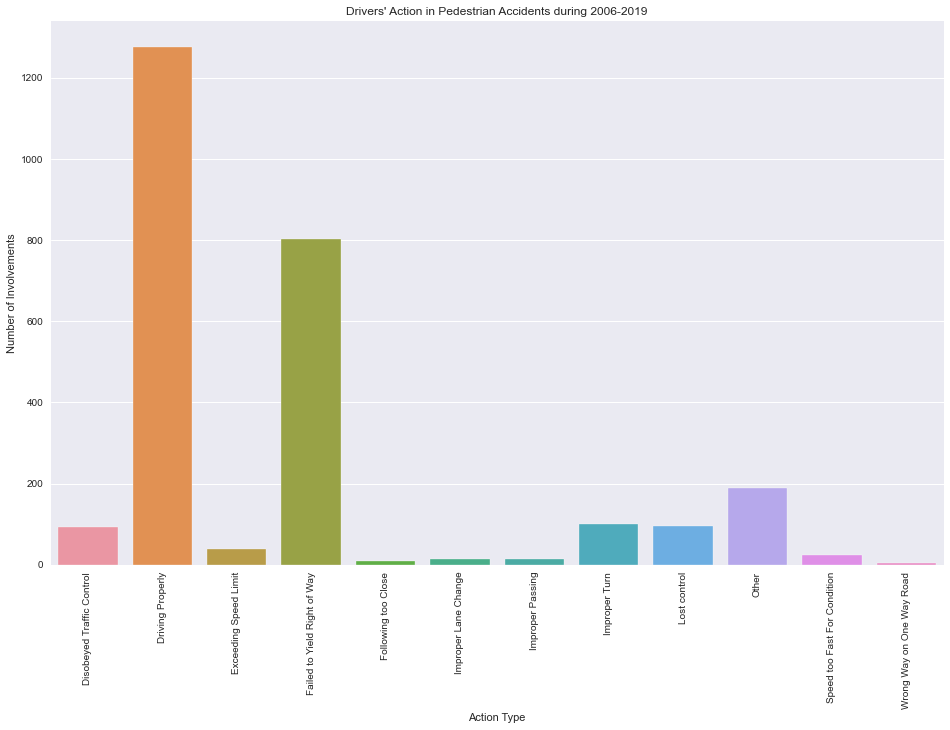

In [125]:
plt.figure(figsize=(16,10))
ax = sns.barplot(drivers_action.index.values, drivers_action.values)
ax.set_title('Drivers\' Action in Pedestrian Accidents during 2006-2019')
ax.set(xlabel='Action Type', ylabel='Number of Involvements')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show();

### DRIVCOND

In [126]:
drivers_condition = df.groupby('DRIVACT').size().reset_index()
drivers_condition.columns = ['DRIVACT', 'COUNT']
drivers_condition = drivers_condition.sort_values('COUNT', ascending=False).reset_index(drop=True)
drivers_condition

DRIVACT  COUNT
0               Driving Properly   1276
1   Failed to Yield Right of Way    802
2                          Other    189
3                  Improper Turn    101
4                   Lost control     95
5      Disobeyed Traffic Control     94
6          Exceeding Speed Limit     38
7   Speed too Fast For Condition     24
8               Improper Passing     15
9           Improper Lane Change     14
10           Following too Close      9
11     Wrong Way on One Way Road      4

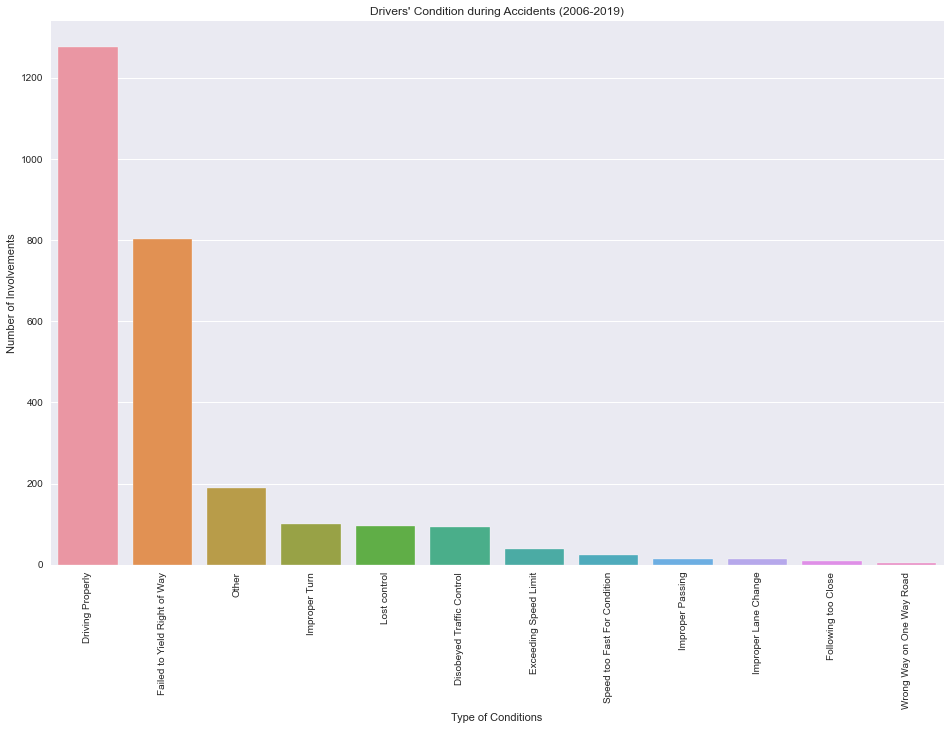

In [127]:
plt.figure(figsize=(16,10))
ax = sns.barplot(x=drivers_condition.index, y='COUNT', data=drivers_condition)
ax.set_title('Drivers\' Condition during Accidents (2006-2019)')
ax.set(xlabel='Type of Conditions', ylabel='Number of Involvements')
ax.set_xticklabels(drivers_condition.DRIVACT)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show();

## Pedestrian Related

### PEDTYPE

In [128]:
pedestrian_type = df.PEDTYPE.value_counts().reset_index()
pedestrian_type.columns = ['PEDTYPE', 'COUNT']
pedestrian_type = pedestrian_type.sort_values(['PEDTYPE', 'COUNT'], ascending=False).reset_index(drop=True)
pedestrian_type

PEDTYPE  COUNT
0   Vehicle turns right while ped crosses without ...     16
1   Vehicle turns right while ped crosses with ROW...    146
2   Vehicle turns left while ped crosses without R...     62
3   Vehicle turns left while ped crosses with ROW ...    506
4            Vehicle is reversing and hits pedestrian     70
5   Vehicle is going straight thru inter.while ped...    445
6   Vehicle is going straight thru inter.while ped...    146
7   Vehicle hits the pedestrian walking or running...     22
8                                             Unknown     16
9   Pedestrian involved in a collision with transi...    131
10             Pedestrian hit on sidewalk or shoulder    195
11                 Pedestrian hit at private driveway     36
12                      Pedestrian hit at parking lot      3
13                        Pedestrian hit at mid-block    653
14         Pedestrian hit a PXO/ped. Mid-block signal     54
15                                  Other / Undefined     69

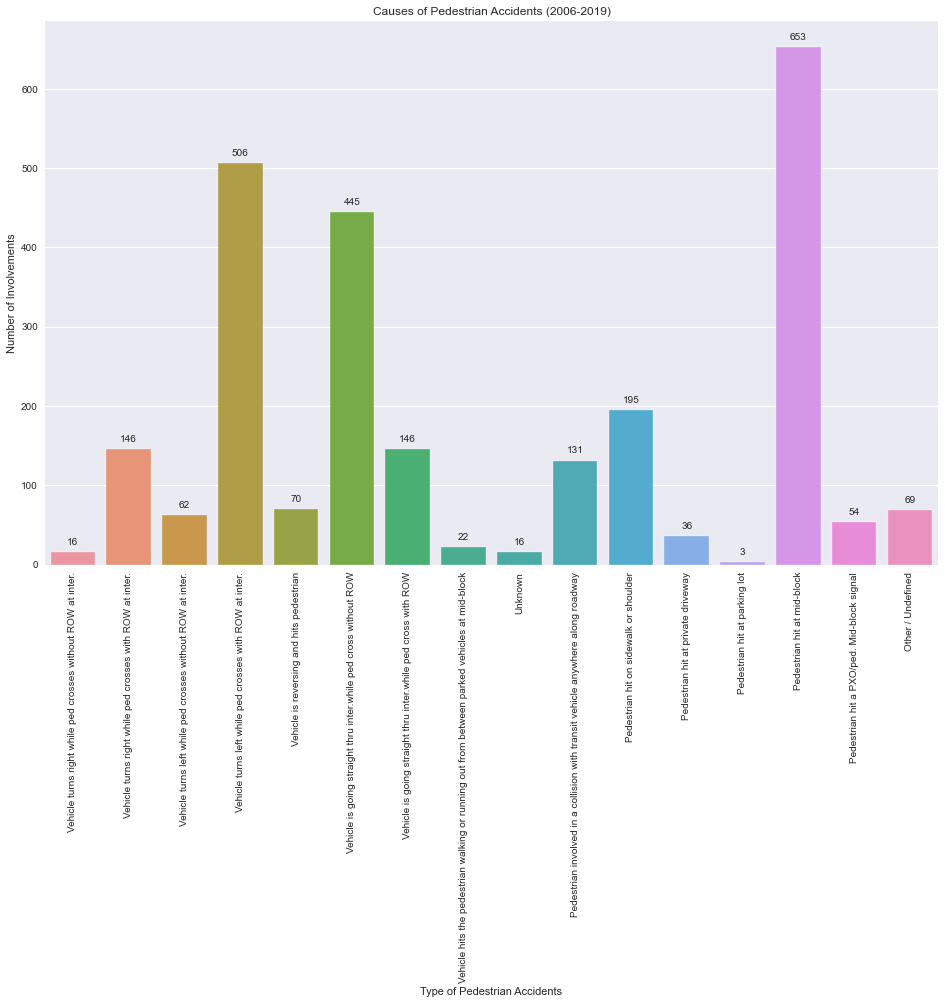

In [129]:
plt.figure(figsize=(16,10))
ax = sns.barplot(x=pedestrian_type.index, y='COUNT', data=pedestrian_type)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha= 'center', va = 'center', xytext = (0,10), textcoords = 'offset points')

ax.set_title('Causes of Pedestrian Accidents (2006-2019)')
ax.set(xlabel='Type of Pedestrian Accidents', ylabel='Number of Involvements')
ax.set_xticklabels(pedestrian_type.PEDTYPE)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show();

### PEDACT

In [130]:
pedestrian_action = df.PEDACT.value_counts().reset_index()
pedestrian_action.columns = ['PEDACT', 'COUNT']
pedestrian_action = pedestrian_action.sort_values(['PEDACT'], ascending=True).reset_index(drop=True)
pedestrian_action

PEDACT  COUNT
0       Coming From Behind Parked Vehicle     31
1   Crossing marked crosswalk without ROW     16
2              Crossing with right of way    790
3           Crossing without right of way    345
4          Crossing, Pedestrian Crossover     57
5            Crossing, no Traffic Control    595
6                 On Sidewalk or Shoulder    216
7                                   Other    195
8        Person Getting on/off School Bus      2
9           Person Getting on/off Vehicle     33
10          Playing or Working on Highway     23
11             Pushing/Working on Vehicle     12
12                   Running onto Roadway    203
13     Walking on Roadway Against Traffic     19
14        Walking on Roadway with Traffic     27

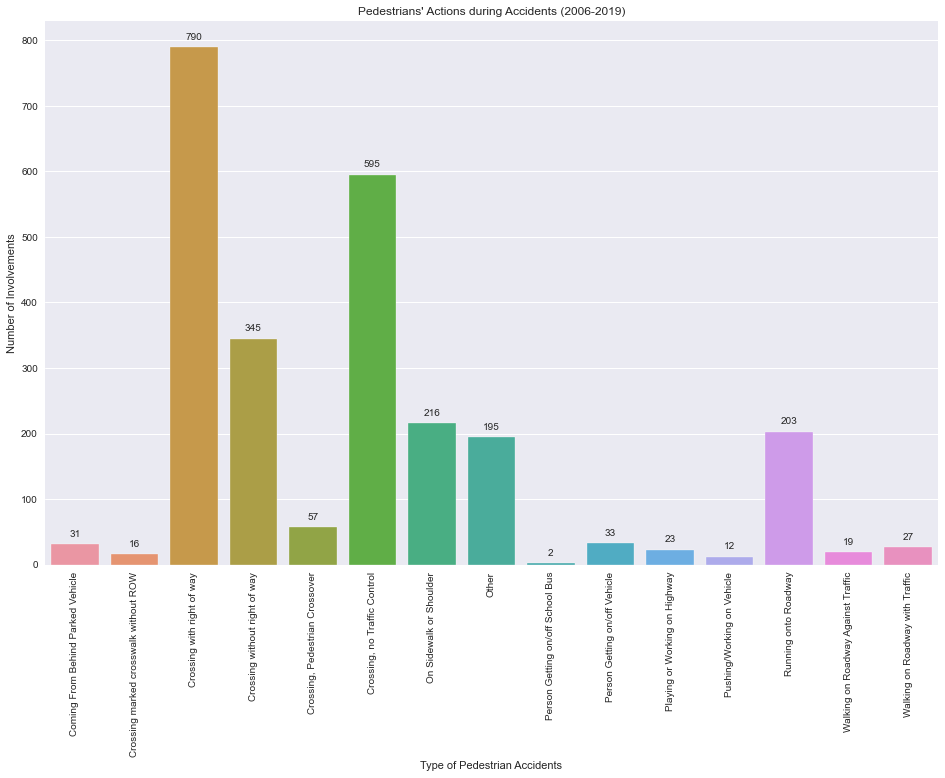

In [131]:
plt.figure(figsize=(16,10))
ax = sns.barplot(x=pedestrian_action.index, y='COUNT', data=pedestrian_action)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha= 'center', va = 'center', xytext = (0,10), textcoords = 'offset points')

ax.set_title('Pedestrians\' Actions during Accidents (2006-2019)')
ax.set(xlabel='Type of Pedestrian Accidents', ylabel='Number of Involvements')
ax.set_xticklabels(pedestrian_action.PEDACT)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show();

### PEDCOND

In [132]:
pedestrian_condition = df.groupby('PEDCOND').size().reset_index()
pedestrian_condition.columns = ['PEDCOND', 'COUNT']
pedestrian_condition = pedestrian_condition.sort_values('COUNT', ascending=False).reset_index(drop=True)
pedestrian_condition

PEDCOND  COUNT
0                              Normal   1489
1                         Inattentive    473
2                             Unknown    345
3                   Had Been Drinking    199
4      Medical or Physical Disability     65
5                               Other     56
6           Ability Impaired, Alcohol     36
7  Ability Impaired, Alcohol Over .80     12
8             Ability Impaired, Drugs      7
9                             Fatigue      2

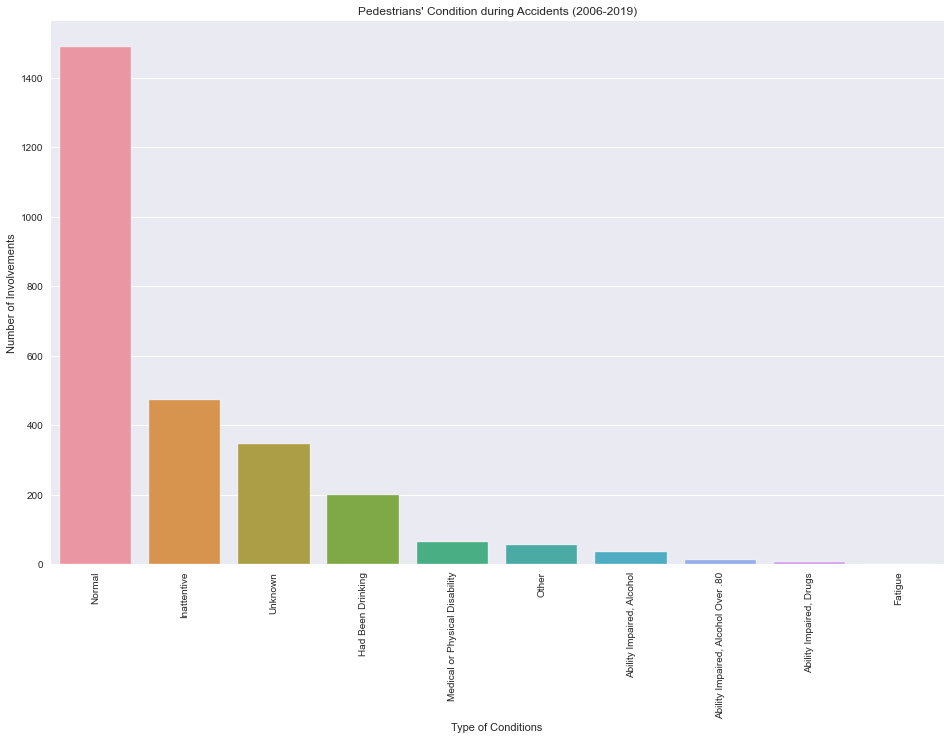

In [133]:
## Pedestrian Condition
plt.figure(figsize=(16,10))
ax = sns.barplot(x=pedestrian_condition.index, y='COUNT', data=pedestrian_condition)
ax.set_title('Pedestrians\' Condition during Accidents (2006-2019)')
ax.set(xlabel='Type of Conditions', ylabel='Number of Involvements')
ax.set_xticklabels(pedestrian_condition.PEDCOND)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show();

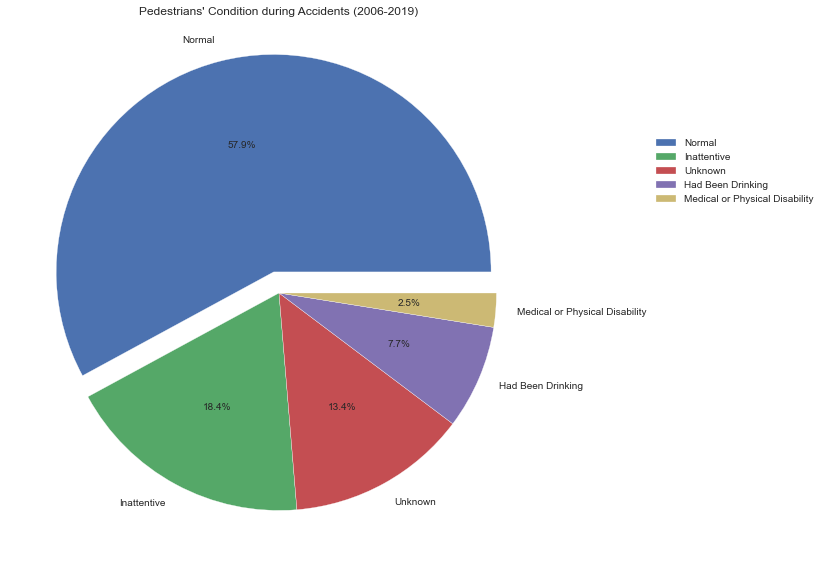

In [134]:
pedcond2 = pedestrian_condition.iloc[:5]
explode = (0.1,0,0,0,0)

fig, ax = plt.subplots(1,1, figsize=(16,10))
ax.pie(pedcond2.COUNT, explode=explode, labels=pedcond2.PEDCOND, autopct='%1.1f%%')
ax.set_title('Pedestrians\' Condition during Accidents (2006-2019)')
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.style.use('seaborn')
plt.show()

# We will skip the CYCLIST part it's insignificant to our model, only 15 cases of involvements

### CYCLISTYPE

In [135]:
cyclist_type = df.CYCLISTYPE.value_counts()
cyclist_type

Cyclist strikes pedestrian.    15
Name: CYCLISTYPE, dtype: int64

### CYCACT

### CYCCOND

In [136]:
parties_involved_list2 = parties_involved_list.copy()
parties_involved_list2.append('PEDESTRIAN')
parties_involved_list2

['CYCLIST',
 'AUTOMOBILE',
 'MOTORCYCLE',
 'TRUCK',
 'TRSN_CITY_VEH',
 'EMERG_VEH',
 'PASSENGER',
 'PEDESTRIAN']

# Parties

In [137]:
parties = df[parties_involved_list2].sum().reset_index()
parties.columns = ['PARTIES', 'COUNT']
parties = parties.sort_values('COUNT', ascending=False).reset_index(drop=True)
# parties.at[0,'PARTIES'] = 'ALL_PEDESTRIAN_ACC'
parties

PARTIES  COUNT
0     PEDESTRIAN   6484
1     AUTOMOBILE   5638
2      PASSENGER   1071
3  TRSN_CITY_VEH    444
4          TRUCK    353
5     MOTORCYCLE     54
6        CYCLIST     33
7      EMERG_VEH      6

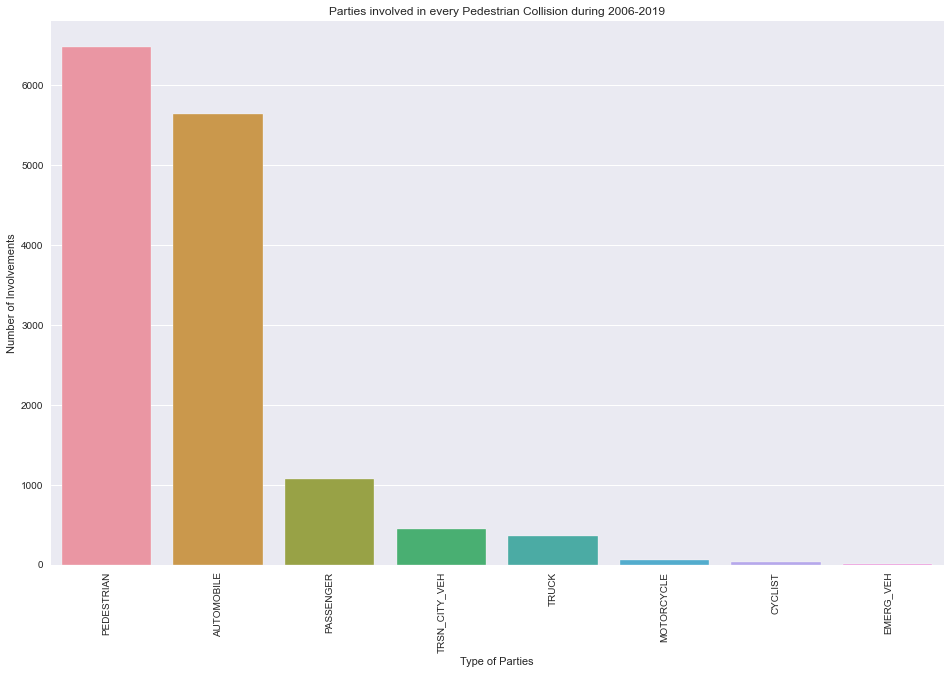

In [138]:
plt.figure(figsize=(16,10))
ax = sns.barplot(x='PARTIES', y='COUNT', data=parties)
ax.set_title('Parties involved in every Pedestrian Collision during 2006-2019')
ax.set(xlabel='Type of Parties', ylabel='Number of Involvements')
ax.set_xticklabels(parties.PARTIES)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show();

## Driving Behaviors

we will add pedestrian counts for contrast

In [139]:
driving_behaviors_list2 = driving_behaviors_list.copy()
driving_behaviors_list2.append('PEDESTRIAN')
driving_behaviors_list2

['SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'PEDESTRIAN']

In [140]:
behaviors = df[driving_behaviors_list2].sum().reset_index()
behaviors.columns = ['BEHAVIORS', 'COUNT']
behaviors = behaviors.sort_values('COUNT', ascending=False).reset_index(drop=True)
behaviors

BEHAVIORS  COUNT
0  PEDESTRIAN   6484
1     AG_DRIV   2686
2    SPEEDING    319
3    REDLIGHT    233
4     ALCOHOL    138
5  DISABILITY     48

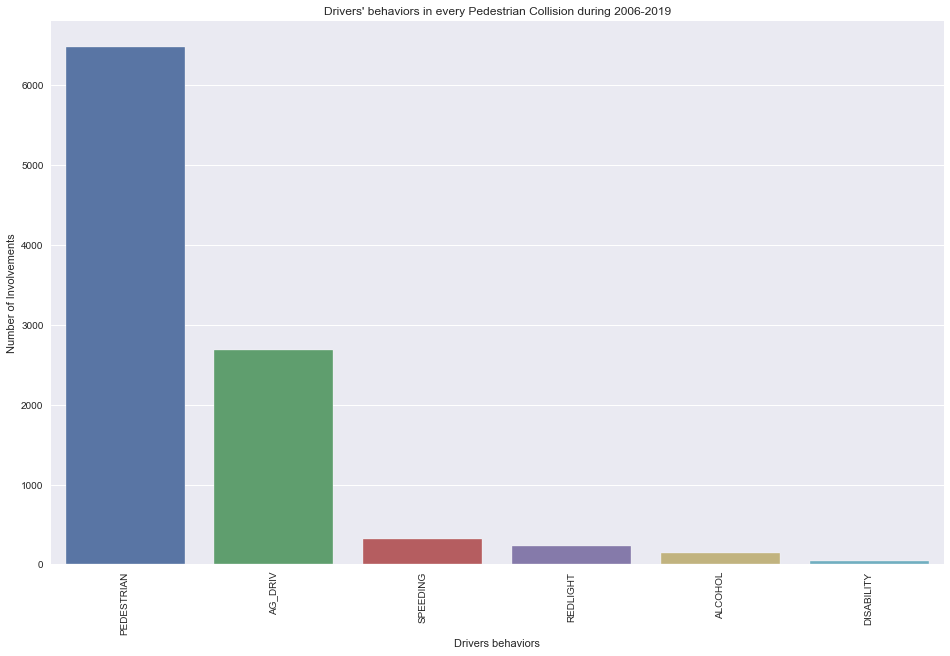

In [141]:
plt.figure(figsize=(16,10))
ax = sns.barplot(x='BEHAVIORS', y='COUNT', data=behaviors)
ax.set_title('Drivers\' behaviors in every Pedestrian Collision during 2006-2019')
ax.set(xlabel='Drivers behaviors', ylabel='Number of Involvements')
ax.set_xticklabels(behaviors.BEHAVIORS)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show();

## Univariable Analysis Complete up to here